In [116]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [117]:
# load the dataset if you are using Jupyter Notebook

# identify the path of your dataset

World_Marriage_df = pd.read_csv("World Marriage Dataset.csv")

In [118]:
World_Marriage_df.shape

(271604, 9)

In [119]:
World_Marriage_df.head()

,Sr.No.,Country,AgeGroup,Sex,MaritalStatus,DataProcess,Data Collection (Start Year),Data Collection (End Year),Data Source
0,1,Afghanistan,[15-19],Man,Divorced,Survey,1972,1974,National statistics
1,2,Afghanistan,[20-24],Man,Divorced,Survey,1972,1974,National statistics
2,3,Afghanistan,[25-29],Man,Divorced,Survey,1972,1974,National statistics
3,4,Afghanistan,[30-34],Man,Divorced,Survey,1972,1974,National statistics
4,5,Afghanistan,[35-39],Man,Divorced,Survey,1972,1974,National statistics


In [120]:
World_Marriage_df.tail()

,Sr.No.,Country,AgeGroup,Sex,MaritalStatus,DataProcess,Data Collection (Start Year),Data Collection (End Year),Data Source
271599,271600,Zimbabwe,[55-59],Woman,Widowed,Survey,2017,2017,National statistics
271600,271601,Zimbabwe,[60-64],Woman,Widowed,Survey,2017,2017,National statistics
271601,271602,Zimbabwe,[65-69],Woman,Widowed,Survey,2017,2017,National statistics
271602,271603,Zimbabwe,[70-74],Woman,Widowed,Survey,2017,2017,National statistics
271603,271604,Zimbabwe,[75+],Woman,Widowed,Survey,2017,2017,National statistics


In [121]:
World_Marriage_df.dtypes

Sr.No.                           int64
Country                         object
AgeGroup                        object
Sex                             object
MaritalStatus                   object
DataProcess                     object
Data Collection (Start Year)     int64
Data Collection (End Year)       int64
Data Source                     object
dtype: object

In [122]:
World_Marriage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271604 entries, 0 to 271603
Data columns (total 9 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Sr.No.                        271604 non-null  int64 
 1   Country                       271604 non-null  object
 2   AgeGroup                      271604 non-null  object
 3   Sex                           271604 non-null  object
 4   MaritalStatus                 271604 non-null  object
 5   DataProcess                   271604 non-null  object
 6   Data Collection (Start Year)  271604 non-null  int64 
 7   Data Collection (End Year)    271604 non-null  int64 
 8   Data Source                   271604 non-null  object
dtypes: int64(3), object(6)
memory usage: 18.6+ MB


In [123]:
print(World_Marriage_df['MaritalStatus'].unique())

['Divorced' 'Married' 'Single' 'Widowed' 'Divorced or Separated'
 'Separated' 'Never married' 'Not in union' 'Not living together'
 'Married or Living together' 'Widowed or divorced' 'Living together'
 'Consensual union' 'Ever married' 'Currently not married'
 'Consensual union, not living together' 'Married or in consensual union'
 'Married or married but separated' 'Registred partnership'
 'Visiting partner' 'Widowed, divorced or separated'
 'Married, in consensual unions or separated'
 'Separated from consensual union'
 'Currently not married nor in consensual union' 'Marriage contract'
 'Divorced or Separated or Widowed' 'Separated from marriage'
 'Married gaunna not performed' 'Married monogamous' 'Married polygamous'
 'Divorced or Widowed' 'Single or in consensual unions'
 'Widowed or separated' 'Married spouse absent' 'Married spouse present']


In [124]:
World_Marriage_df['MaritalStatus']

0         Divorced
1         Divorced
2         Divorced
3         Divorced
4         Divorced
            ...   
271599     Widowed
271600     Widowed
271601     Widowed
271602     Widowed
271603     Widowed
Name: MaritalStatus, Length: 271604, dtype: object

# Data Transforming

In [125]:
World_Marriage_df.columns

Index(['Sr.No.', 'Country', 'AgeGroup', 'Sex', 'MaritalStatus', 'DataProcess',
       'Data Collection (Start Year)', 'Data Collection (End Year)',
       'Data Source'],
      dtype='object')

In [126]:
# Remove Serial No.
World_Marriage_1_df = World_Marriage_df.drop("Sr.No.", axis = 1)

In [127]:
# Change the name of the columns
World_Marriage_1_df.columns = ['Country', 'Age Group','Sex','Marital Status','Data Process','Start Year','End Year','Data Source']

In [128]:
World_Marriage_1_df.head()

,Country,Age Group,Sex,Marital Status,Data Process,Start Year,End Year,Data Source
0,Afghanistan,[15-19],Man,Divorced,Survey,1972,1974,National statistics
1,Afghanistan,[20-24],Man,Divorced,Survey,1972,1974,National statistics
2,Afghanistan,[25-29],Man,Divorced,Survey,1972,1974,National statistics
3,Afghanistan,[30-34],Man,Divorced,Survey,1972,1974,National statistics
4,Afghanistan,[35-39],Man,Divorced,Survey,1972,1974,National statistics


# Data Pre-processing

# 1. Identify Problematic Data 

Load the Dataset and check for missing values, duplicates, and outliers.

In [129]:
# Identify missing values
missing_values = World_Marriage_1_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Country           0
Age Group         0
Sex               0
Marital Status    0
Data Process      0
Start Year        0
End Year          0
Data Source       0
dtype: int64


In [130]:
# Identify duplicates
duplicates = World_Marriage_1_df.duplicated().sum()
print("Number of duplicate rows: ", duplicates)

Number of duplicate rows:  187


In [131]:
duplicates_dt = World_Marriage_1_df[World_Marriage_1_df.duplicated()]

In [132]:
duplicates_dt

,Country,Age Group,Sex,Marital Status,Data Process,Start Year,End Year,Data Source
140287,Lebanon,[15-19],Man,Married,Survey,2004,2004,National statistics
140288,Lebanon,[20-24],Man,Married,Survey,2004,2004,National statistics
140289,Lebanon,[25-29],Man,Married,Survey,2004,2004,National statistics
140290,Lebanon,[30-34],Man,Married,Survey,2004,2004,National statistics
140291,Lebanon,[35-39],Man,Married,Survey,2004,2004,National statistics
...,...,...,...,...,...,...,...,...
252784,Uganda,[55-59],Woman,Widowed,Survey,2011,2011,DHS_HH
252785,Uganda,[60-64],Woman,Widowed,Survey,2011,2011,DHS_HH
252786,Uganda,[65-69],Woman,Widowed,Survey,2011,2011,DHS_HH
252787,Uganda,[70-74],Woman,Widowed,Survey,2011,2011,DHS_HH


In [133]:
print(World_Marriage_1_df.describe())

          Start Year       End Year
count  271604.000000  271604.000000
mean     1996.961488    1997.059097
std        14.244590      14.284136
min      1954.000000    1955.000000
25%      1986.000000    1986.000000
50%      2000.000000    2000.000000
75%      2010.000000    2010.000000
max      2019.000000    2019.000000


# 2. Cleaning the Data

Remove duplicates, handle missing values, and standardize inconsistent data.

In [134]:
# Remove duplicate rows
World_Marriage_2_df = World_Marriage_1_df.drop_duplicates()

In [135]:
# Handling missing data
# Option 1: Drop rows with missing values (only if missing values are minimal)
World_Marriage_3_df = World_Marriage_2_df.dropna()

In [136]:
# Example: Fill missing categorical values with mode
World_Marriage_3_df.fillna(World_Marriage_3_df.mode().iloc[0], inplace=True)

In [137]:

# Standardize inconsistent data (e.g., different formats of the same information)
World_Marriage_3_df['Age Group'] = World_Marriage_3_df['Age Group'].str.lower().str.strip()

In [138]:
# Standardize categorical columns
World_Marriage_3_df['Sex'] = World_Marriage_3_df['Sex'].str.lower().str.strip()
World_Marriage_3_df['Marital Status'] = World_Marriage_3_df['Marital Status'].str.lower().str.strip()

In [139]:
World_Marriage_3_df

,Country,Age Group,Sex,Marital Status,Data Process,Start Year,End Year,Data Source
0,Afghanistan,[15-19],man,divorced,Survey,1972,1974,National statistics
1,Afghanistan,[20-24],man,divorced,Survey,1972,1974,National statistics
2,Afghanistan,[25-29],man,divorced,Survey,1972,1974,National statistics
3,Afghanistan,[30-34],man,divorced,Survey,1972,1974,National statistics
4,Afghanistan,[35-39],man,divorced,Survey,1972,1974,National statistics
...,...,...,...,...,...,...,...,...
271599,Zimbabwe,[55-59],woman,widowed,Survey,2017,2017,National statistics
271600,Zimbabwe,[60-64],woman,widowed,Survey,2017,2017,National statistics
271601,Zimbabwe,[65-69],woman,widowed,Survey,2017,2017,National statistics
271602,Zimbabwe,[70-74],woman,widowed,Survey,2017,2017,National statistics


3. Remove Outliers or Analyze Separately
Detect and analyze outliers using Z-scores or IQR methods.

In [140]:
# Detect outliers using Z-score
from scipy import stats

z_scores = np.abs(stats.zscore(World_Marriage_3_df.select_dtypes(include=[np.number])))
World_Marriage_4_df = World_Marriage_3_df[(z_scores < 3).all(axis=1)]

# Detect outliers using Z-score
z_scores = np.abs(stats.zscore(World_Marriage_3_df.select_dtypes(include=[np.number])))
# Rows where at least one Z-score is greater than or equal to 3 are considered outliers
z_score_outliers = World_Marriage_3_df[(z_scores >= 3).any(axis=1)]

# Alternative: Detect outliers using IQR
Q1 = World_Marriage_4_df.quantile(0.25)
Q3 = World_Marriage_4_df.quantile(0.75)
IQR = Q3 - Q1
IQR_outliers = World_Marriage_3_df[((World_Marriage_3_df < (Q1 - 1.5 * IQR)) | 
                                    (World_Marriage_3_df > (Q3 + 1.5 * IQR))).any(axis=1)]
World_Marriage_5_df = World_Marriage_4_df[~((World_Marriage_4_df < (Q1 - 1.5 * IQR)) |
                                            (World_Marriage_4_df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [141]:
# Show outliers detected by Z-score method
print("Outliers detected by Z-score method:")
print(z_score_outliers)

# Show outliers detected by IQR method
print("Outliers detected by IQR method:")
print(IQR_outliers)

Outliers detected by Z-score method:
      Country Age Group    Sex    Marital Status Data Process  Start Year  \
98611  Guinea   [14-19]    man  consensual union       Survey        1954   
98612  Guinea   [20-24]    man  consensual union       Survey        1954   
98613  Guinea   [25-29]    man  consensual union       Survey        1954   
98614  Guinea   [30-34]    man  consensual union       Survey        1954   
98615  Guinea   [35-39]    man  consensual union       Survey        1954   
...       ...       ...    ...               ...          ...         ...   
98708  Guinea   [50-54]  woman           widowed       Survey        1954   
98709  Guinea   [55-59]  woman           widowed       Survey        1954   
98710  Guinea   [60-64]  woman           widowed       Survey        1954   
98711  Guinea   [65-69]  woman           widowed       Survey        1954   
98712  Guinea     [70+]  woman           widowed       Survey        1954   

       End Year Data Source  
98611   

In [142]:
World_Marriage_5_df

,Country,Age Group,Sex,Marital Status,Data Process,Start Year,End Year,Data Source
0,Afghanistan,[15-19],man,divorced,Survey,1972,1974,National statistics
1,Afghanistan,[20-24],man,divorced,Survey,1972,1974,National statistics
2,Afghanistan,[25-29],man,divorced,Survey,1972,1974,National statistics
3,Afghanistan,[30-34],man,divorced,Survey,1972,1974,National statistics
4,Afghanistan,[35-39],man,divorced,Survey,1972,1974,National statistics
...,...,...,...,...,...,...,...,...
271599,Zimbabwe,[55-59],woman,widowed,Survey,2017,2017,National statistics
271600,Zimbabwe,[60-64],woman,widowed,Survey,2017,2017,National statistics
271601,Zimbabwe,[65-69],woman,widowed,Survey,2017,2017,National statistics
271602,Zimbabwe,[70-74],woman,widowed,Survey,2017,2017,National statistics


# 4. Purge Contaminated Data and Correct Leaking Pipelines

Manually inspect and purge any contaminated data, such as wrong labels or misentered data.

In [143]:
# Example: Check for any impossible values in categorical fields
valid_marital_statuses = ['single', 'married', 'divorced', 'widowed', 'separated']
invalid_marital_status = World_Marriage_5_df[~World_Marriage_5_df['Marital Status'].isin(valid_marital_statuses)]
print("Invalid Marital Status:\n", invalid_marital_status)

# Drop rows with invalid entries
World_Marriage_6_df = World_Marriage_5_df[World_Marriage_5_df['Marital Status'].isin(valid_marital_statuses)]

Invalid Marital Status:
             Country Age Group    Sex         Marital Status Data Process  \
184     Afghanistan   [15-24]    man  divorced or separated       Survey   
185     Afghanistan   [25-39]    man  divorced or separated       Survey   
186     Afghanistan   [40-64]    man  divorced or separated       Survey   
187     Afghanistan     [65+]    man  divorced or separated       Survey   
200     Afghanistan   [15-24]  woman  divorced or separated       Survey   
...             ...       ...    ...                    ...          ...   
271562     Zimbabwe   [55-59]  woman  divorced or separated       Survey   
271563     Zimbabwe   [60-64]  woman  divorced or separated       Survey   
271564     Zimbabwe   [65-69]  woman  divorced or separated       Survey   
271565     Zimbabwe   [70-74]  woman  divorced or separated       Survey   
271566     Zimbabwe     [75+]  woman  divorced or separated       Survey   

        Start Year  End Year          Data Source  
184       

In [144]:
World_Marriage_6_df

,Country,Age Group,Sex,Marital Status,Data Process,Start Year,End Year,Data Source
0,Afghanistan,[15-19],man,divorced,Survey,1972,1974,National statistics
1,Afghanistan,[20-24],man,divorced,Survey,1972,1974,National statistics
2,Afghanistan,[25-29],man,divorced,Survey,1972,1974,National statistics
3,Afghanistan,[30-34],man,divorced,Survey,1972,1974,National statistics
4,Afghanistan,[35-39],man,divorced,Survey,1972,1974,National statistics
...,...,...,...,...,...,...,...,...
271599,Zimbabwe,[55-59],woman,widowed,Survey,2017,2017,National statistics
271600,Zimbabwe,[60-64],woman,widowed,Survey,2017,2017,National statistics
271601,Zimbabwe,[65-69],woman,widowed,Survey,2017,2017,National statistics
271602,Zimbabwe,[70-74],woman,widowed,Survey,2017,2017,National statistics


# 5. Standardize Inconsistent Data
Ensure all similar data is standardized.

In [145]:
# Standardizing categorical columns if needed
World_Marriage_6_df['Age Group'] = World_Marriage_6_df['Age Group'].str.capitalize()
World_Marriage_6_df['Sex'] = World_Marriage_6_df['Sex'].str.capitalize()
World_Marriage_6_df['Marital Status'] = World_Marriage_6_df['Marital Status'].str.capitalize()

In [146]:
World_Marriage_6_df

,Country,Age Group,Sex,Marital Status,Data Process,Start Year,End Year,Data Source
0,Afghanistan,[15-19],Man,Divorced,Survey,1972,1974,National statistics
1,Afghanistan,[20-24],Man,Divorced,Survey,1972,1974,National statistics
2,Afghanistan,[25-29],Man,Divorced,Survey,1972,1974,National statistics
3,Afghanistan,[30-34],Man,Divorced,Survey,1972,1974,National statistics
4,Afghanistan,[35-39],Man,Divorced,Survey,1972,1974,National statistics
...,...,...,...,...,...,...,...,...
271599,Zimbabwe,[55-59],Woman,Widowed,Survey,2017,2017,National statistics
271600,Zimbabwe,[60-64],Woman,Widowed,Survey,2017,2017,National statistics
271601,Zimbabwe,[65-69],Woman,Widowed,Survey,2017,2017,National statistics
271602,Zimbabwe,[70-74],Woman,Widowed,Survey,2017,2017,National statistics


# 6. Check Data Validity
Ensure that the data makes logical sense.

In [147]:
# Check if the data makes sense
print(World_Marriage_6_df['Sex'].unique())
print(World_Marriage_6_df['Marital Status'].unique())

['Man' 'Woman']
['Divorced' 'Married' 'Single' 'Widowed' 'Separated']


# 7. Deduplicate Records
Ensure no duplicate records remain.

In [148]:
# Ensure no duplicates after cleaning
World_Marriage_7_df = World_Marriage_6_df.drop_duplicates()

In [149]:
World_Marriage_7_df

,Country,Age Group,Sex,Marital Status,Data Process,Start Year,End Year,Data Source
0,Afghanistan,[15-19],Man,Divorced,Survey,1972,1974,National statistics
1,Afghanistan,[20-24],Man,Divorced,Survey,1972,1974,National statistics
2,Afghanistan,[25-29],Man,Divorced,Survey,1972,1974,National statistics
3,Afghanistan,[30-34],Man,Divorced,Survey,1972,1974,National statistics
4,Afghanistan,[35-39],Man,Divorced,Survey,1972,1974,National statistics
...,...,...,...,...,...,...,...,...
271599,Zimbabwe,[55-59],Woman,Widowed,Survey,2017,2017,National statistics
271600,Zimbabwe,[60-64],Woman,Widowed,Survey,2017,2017,National statistics
271601,Zimbabwe,[65-69],Woman,Widowed,Survey,2017,2017,National statistics
271602,Zimbabwe,[70-74],Woman,Widowed,Survey,2017,2017,National statistics


# 8. Rinse and Repeat
Iteratively check and clean the data as new issues might arise.

In [150]:
# After cleaning, recheck the data
print(World_Marriage_7_df.info())
print(World_Marriage_7_df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228216 entries, 0 to 271603
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Country         228216 non-null  object
 1   Age Group       228216 non-null  object
 2   Sex             228216 non-null  object
 3   Marital Status  228216 non-null  object
 4   Data Process    228216 non-null  object
 5   Start Year      228216 non-null  int64 
 6   End Year        228216 non-null  int64 
 7   Data Source     228216 non-null  object
dtypes: int64(2), object(6)
memory usage: 15.7+ MB
None
          Start Year       End Year
count  228216.000000  228216.000000
mean     1996.540909    1996.619619
std        14.292680      14.320451
min      1959.000000    1959.000000
25%      1985.000000    1985.000000
50%      2000.000000    2000.000000
75%      2009.000000    2010.000000
max      2019.000000    2019.000000


<Axes: >

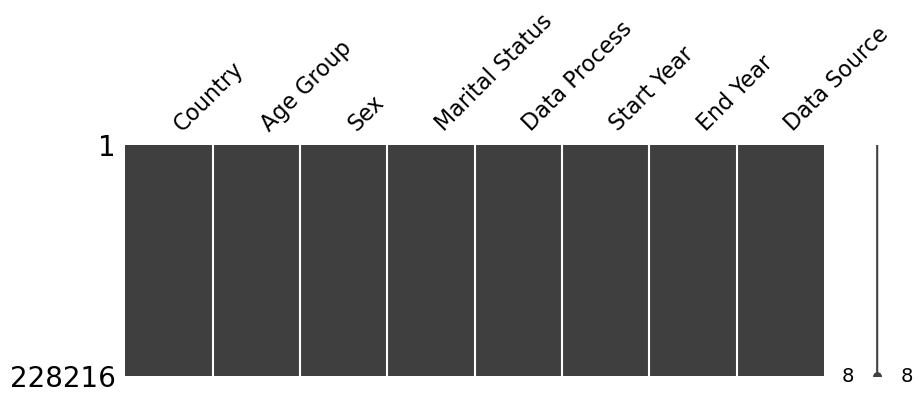

In [151]:
msno.matrix(World_Marriage_7_df, figsize = (10,  3))

In [152]:
print(World_Marriage_7_df)

            Country Age Group    Sex Marital Status Data Process  Start Year  \
0       Afghanistan   [15-19]    Man       Divorced       Survey        1972   
1       Afghanistan   [20-24]    Man       Divorced       Survey        1972   
2       Afghanistan   [25-29]    Man       Divorced       Survey        1972   
3       Afghanistan   [30-34]    Man       Divorced       Survey        1972   
4       Afghanistan   [35-39]    Man       Divorced       Survey        1972   
...             ...       ...    ...            ...          ...         ...   
271599     Zimbabwe   [55-59]  Woman        Widowed       Survey        2017   
271600     Zimbabwe   [60-64]  Woman        Widowed       Survey        2017   
271601     Zimbabwe   [65-69]  Woman        Widowed       Survey        2017   
271602     Zimbabwe   [70-74]  Woman        Widowed       Survey        2017   
271603     Zimbabwe     [75+]  Woman        Widowed       Survey        2017   

        End Year          Data Source  

In [153]:
type(World_Marriage_7_df)

pandas.core.frame.DataFrame

In [154]:
# saving the dataframe
World_Marriage_7_df.to_csv('World_Marriage_Cleaned_Dataset.csv',index=False)

# EDA

In [155]:
# Count the number of entries per country
top_20_countries = World_Marriage_7_df['Country'].value_counts().nlargest(20).index

# Filter the dataset for these top 10 countries
data_top_20 = World_Marriage_7_df[World_Marriage_7_df['Country'].isin(top_20_countries)]


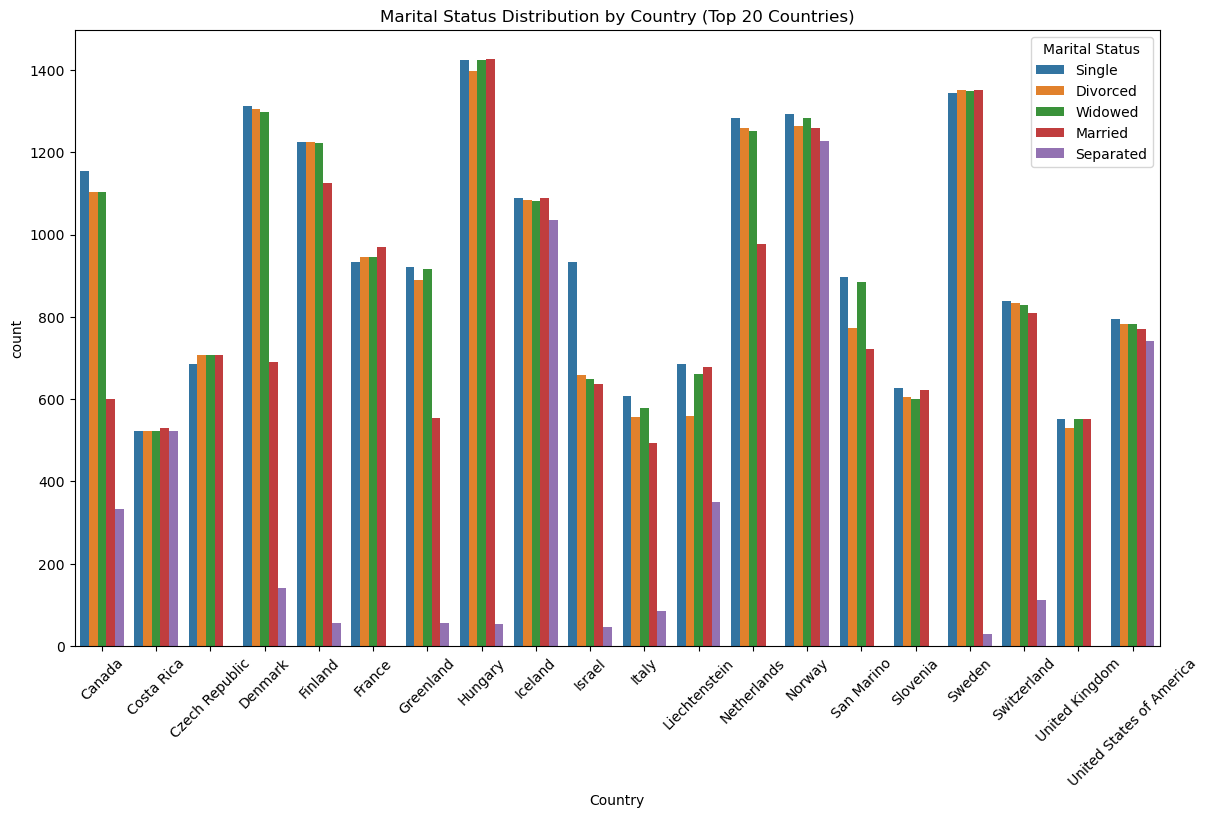

In [156]:
# Marital status distribution by country for the top 10 countries
plt.figure(figsize=(14, 8))
sns.countplot(data=data_top_20, x='Country', hue='Marital Status')
plt.title('Marital Status Distribution by Country (Top 20 Countries)')
plt.xticks(rotation=45)
plt.show()

In [157]:
# Count the number of entries per age group
top_10_age_groups = World_Marriage_7_df['Age Group'].value_counts().nlargest(10).index

# Filter the dataset for these top 15 age groups
data_top_10_age_groups = World_Marriage_7_df[World_Marriage_7_df['Age Group'].isin(top_10_age_groups)]

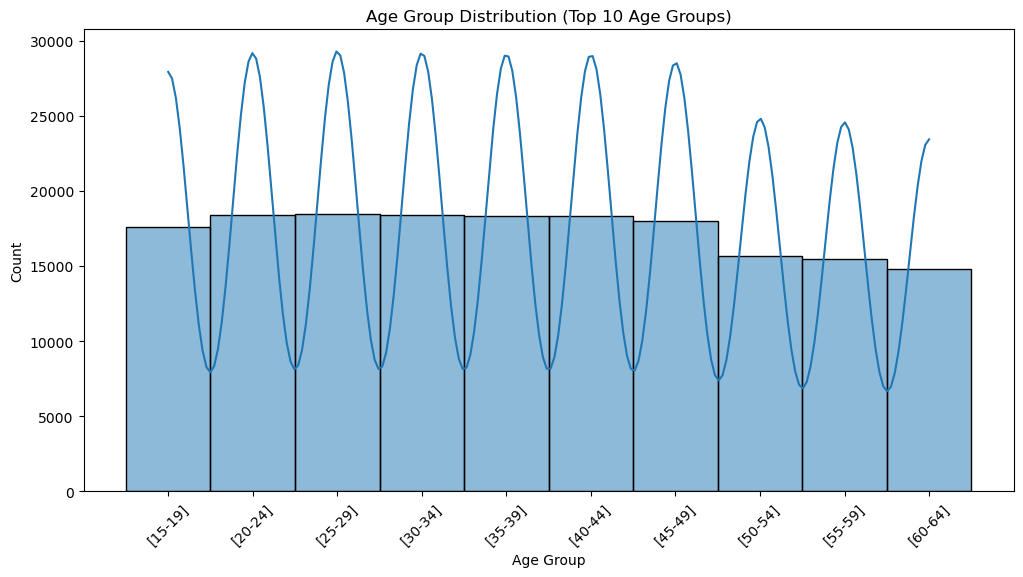

In [158]:
# Age group distribution for the top 15 age groups
plt.figure(figsize=(12, 6))
sns.histplot(data_top_10_age_groups['Age Group'], kde=True, bins=15)
plt.title('Age Group Distribution (Top 10 Age Groups)')
plt.xticks(rotation=45)
plt.show()


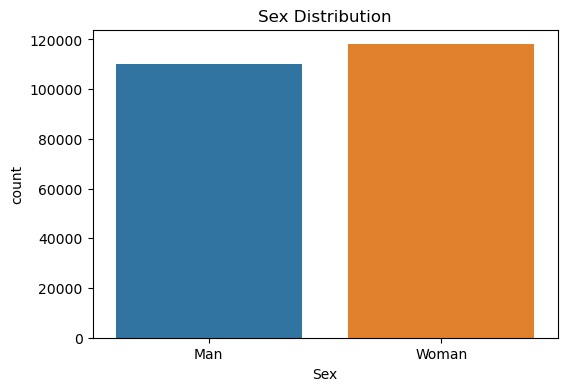

In [159]:
# Distribution of sexes in the dataset
plt.figure(figsize=(6, 4))
sns.countplot(data=World_Marriage_7_df, x='Sex')
plt.title('Sex Distribution')
plt.show()

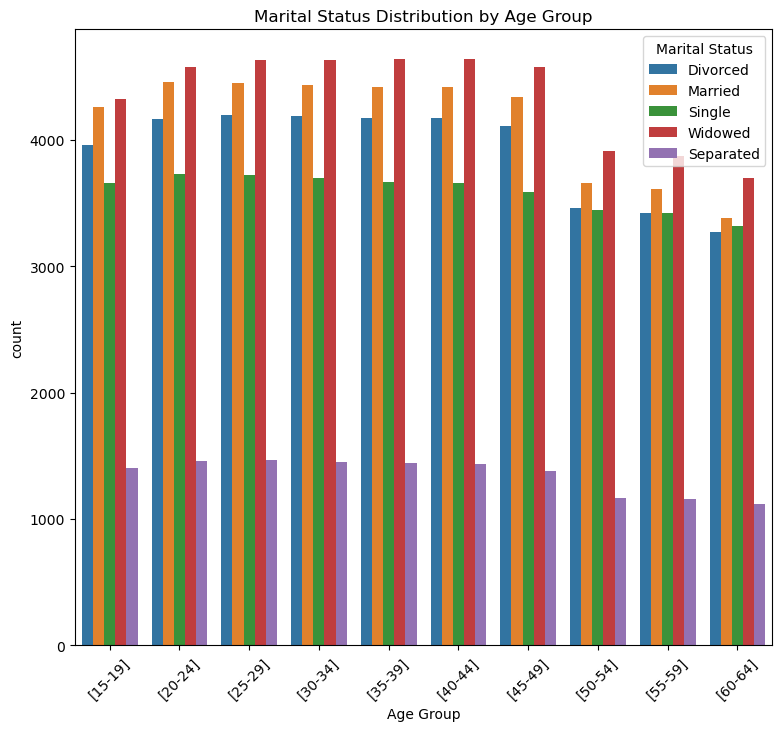

In [160]:
# Marital status by age group
plt.figure(figsize=(9, 8))
sns.countplot(data=data_top_10_age_groups, x='Age Group', hue='Marital Status')
plt.title('Marital Status Distribution by Age Group')
plt.xticks(rotation=45)
plt.show()


In [161]:
# Calculate the distribution of marital statuses
marital_status_counts = World_Marriage_7_df['Marital Status'].value_counts()

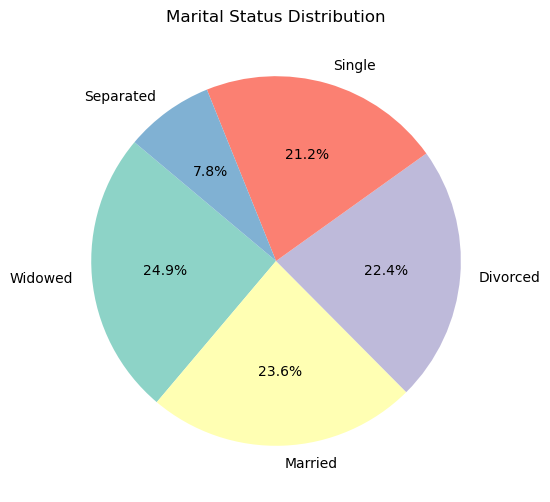

In [162]:
# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title('Marital Status Distribution')
plt.show()

In [163]:
pip install geopandas folium

Note: you may need to restart the kernel to use updated packages.


In [164]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [165]:
# Example assuming each row represents an individual
World_Marriage_7_df['Count'] = 1

# Pivot the data
marital_counts = World_Marriage_7_df.pivot_table(index='Country', columns='Marital Status', values='Count', aggfunc='sum', fill_value=0).reset_index()

# Rename the columns for clarity
marital_counts.columns = ['Country', 'Divorced', 'Married', 'Single', 'Widowed','Separated']


In [166]:
marital_counts.columns

Index(['Country', 'Divorced', 'Married', 'Single', 'Widowed', 'Separated'], dtype='object')

In [167]:
marital_counts

,Country,Divorced,Married,Single,Widowed,Separated
0,Afghanistan,100,116,14,71,116
1,Albania,141,185,61,91,191
2,Algeria,129,162,57,129,160
3,American Samoa,84,86,58,90,86
4,Angola,101,95,87,48,121
...,...,...,...,...,...,...
229,Wallis and Futuna,77,152,0,156,143
230,Western Sahara,28,0,28,28,28
231,Yemen,204,205,0,102,205
232,Zambia,252,252,101,86,272


In [168]:
# Calculate the total population for each country
marital_counts['Total'] = marital_counts[['Divorced', 'Married', 'Single', 'Widowed','Separated']].sum(axis=1)

In [169]:
marital_counts

,Country,Divorced,Married,Single,Widowed,Separated,Total
0,Afghanistan,100,116,14,71,116,417
1,Albania,141,185,61,91,191,669
2,Algeria,129,162,57,129,160,637
3,American Samoa,84,86,58,90,86,404
4,Angola,101,95,87,48,121,452
...,...,...,...,...,...,...,...
229,Wallis and Futuna,77,152,0,156,143,528
230,Western Sahara,28,0,28,28,28,112
231,Yemen,204,205,0,102,205,716
232,Zambia,252,252,101,86,272,963


In [170]:
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

In [171]:
# Example: Aggregate the data by country without using percentage fields
marriage_patterns = marital_counts.groupby('Country').agg({
    'Married': 'sum', 
    'Single': 'sum',
    'Divorced': 'sum',
    'Widowed': 'sum',
    'Separated': 'sum',
    'Total': 'sum'
}).reset_index()

In [172]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map from Natural Earth (this approach should work with newer versions)
shapefile_path = r"C:/Users/user/Desktop/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp"

# Load the shapefile
world = gpd.read_file(shapefile_path)

# Check the columns
print(world.columns)

world

Index(['scalerank', 'featurecla', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT', 'NAME_ALT',
       'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST',
       'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS', 'GDP_YEAR', 'ECONOMY',
       'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2', 'ISO_A3', 'ISO_N3',
       'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE',
       'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN', 'ADM0_A3_WB', 'CONTINENT',
       'REGION_UN', 'SUBREGION', 'REGION_WB', 'NAME_LEN', 'LONG_LEN',
       'ABBREV_LEN', 'TINY', 'HOMEPART', 'geometry'],
      dtype='object')


,scalerank,featurecla,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,geometry
0,3,Admin-0 country,5.0,Netherlands,NL1,1.0,2.0,Country,Aruba,ABW,...,North America,Americas,Caribbean,Latin America & Caribbean,5.0,5.0,5.0,4.0,-99.0,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,0,Admin-0 country,3.0,Afghanistan,AFG,0.0,2.0,Sovereign country,Afghanistan,AFG,...,Asia,Asia,Southern Asia,South Asia,11.0,11.0,4.0,-99.0,1.0,"POLYGON ((71.0498 38.40866, 71.05714 38.40903,..."
2,0,Admin-0 country,3.0,Angola,AGO,0.0,2.0,Sovereign country,Angola,AGO,...,Africa,Africa,Middle Africa,Sub-Saharan Africa,6.0,6.0,4.0,-99.0,1.0,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,3,Admin-0 country,6.0,United Kingdom,GB1,1.0,2.0,Dependency,Anguilla,AIA,...,North America,Americas,Caribbean,Latin America & Caribbean,8.0,8.0,4.0,-99.0,-99.0,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,0,Admin-0 country,6.0,Albania,ALB,0.0,2.0,Sovereign country,Albania,ALB,...,Europe,Europe,Southern Europe,Europe & Central Asia,7.0,7.0,4.0,-99.0,1.0,"POLYGON ((19.74777 42.5789, 19.74601 42.57993,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,3,Admin-0 country,4.0,Samoa,WSM,0.0,2.0,Sovereign country,Samoa,WSM,...,Oceania,Oceania,Polynesia,East Asia & Pacific,5.0,5.0,5.0,-99.0,1.0,"MULTIPOLYGON (((-171.57002 -13.93816, -171.564..."
251,0,Admin-0 country,3.0,Yemen,YEM,0.0,2.0,Sovereign country,Yemen,YEM,...,Asia,Asia,Western Asia,Middle East & North Africa,5.0,5.0,4.0,-99.0,1.0,"MULTIPOLYGON (((53.30824 12.11839, 53.31027 12..."
252,0,Admin-0 country,2.0,South Africa,ZAF,0.0,2.0,Sovereign country,South Africa,ZAF,...,Africa,Africa,Southern Africa,Sub-Saharan Africa,12.0,12.0,5.0,-99.0,1.0,"MULTIPOLYGON (((37.86378 -46.94085, 37.83644 -..."
253,0,Admin-0 country,3.0,Zambia,ZMB,0.0,2.0,Sovereign country,Zambia,ZMB,...,Africa,Africa,Eastern Africa,Sub-Saharan Africa,6.0,6.0,6.0,-99.0,1.0,"POLYGON ((31.11984 -8.61663, 31.14102 -8.60619..."


In [173]:
print(world.columns)

Index(['scalerank', 'featurecla', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT', 'NAME_ALT',
       'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST',
       'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS', 'GDP_YEAR', 'ECONOMY',
       'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2', 'ISO_A3', 'ISO_N3',
       'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE',
       'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN', 'ADM0_A3_WB', 'CONTINENT',
       'REGION_UN', 'SUBREGION', 'REGION_WB', 'NAME_LEN', 'LONG_LEN',
       'ABBREV_LEN', 'TINY', 'HOMEPART', 'geometry'],
      dtype='object')


<Axes: >

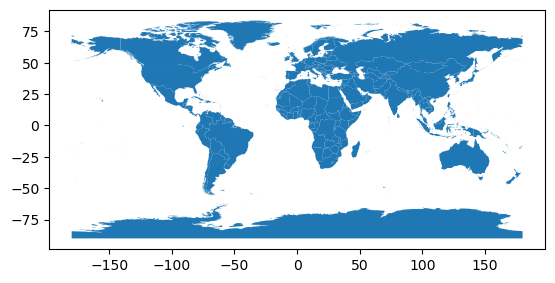

In [174]:
world.plot()

In [175]:
print(world['ADMIN'].to_string())

0                                         Aruba
1                                   Afghanistan
2                                        Angola
3                                      Anguilla
4                                       Albania
5                                         Aland
6                                       Andorra
7                          United Arab Emirates
8                                     Argentina
9                                       Armenia
10                               American Samoa
11                                   Antarctica
12                  Ashmore and Cartier Islands
13          French Southern and Antarctic Lands
14                          Antigua and Barbuda
15                                    Australia
16                                      Austria
17                                   Azerbaijan
18                                      Burundi
19                                      Belgium
20                                      

In [176]:
world_MAS = world.merge(marriage_patterns, how='left', left_on='ADMIN', right_on='Country')

In [177]:
# Display the first few rows to check the merge
print(world_MAS.head())

   scalerank       featurecla  LABELRANK      SOVEREIGNT SOV_A3  ADM0_DIF  \
0          3  Admin-0 country        5.0     Netherlands    NL1       1.0   
1          0  Admin-0 country        3.0     Afghanistan    AFG       0.0   
2          0  Admin-0 country        3.0          Angola    AGO       0.0   
3          3  Admin-0 country        6.0  United Kingdom    GB1       1.0   
4          0  Admin-0 country        6.0         Albania    ALB       0.0   

   LEVEL               TYPE        ADMIN ADM0_A3  ...  TINY HOMEPART  \
0    2.0            Country        Aruba     ABW  ...   4.0    -99.0   
1    2.0  Sovereign country  Afghanistan     AFG  ... -99.0      1.0   
2    2.0  Sovereign country       Angola     AGO  ... -99.0      1.0   
3    2.0         Dependency     Anguilla     AIA  ... -99.0    -99.0   
4    2.0  Sovereign country      Albania     ALB  ... -99.0      1.0   

                                            geometry      Country Married  \
0  POLYGON ((-69.99694 12.5

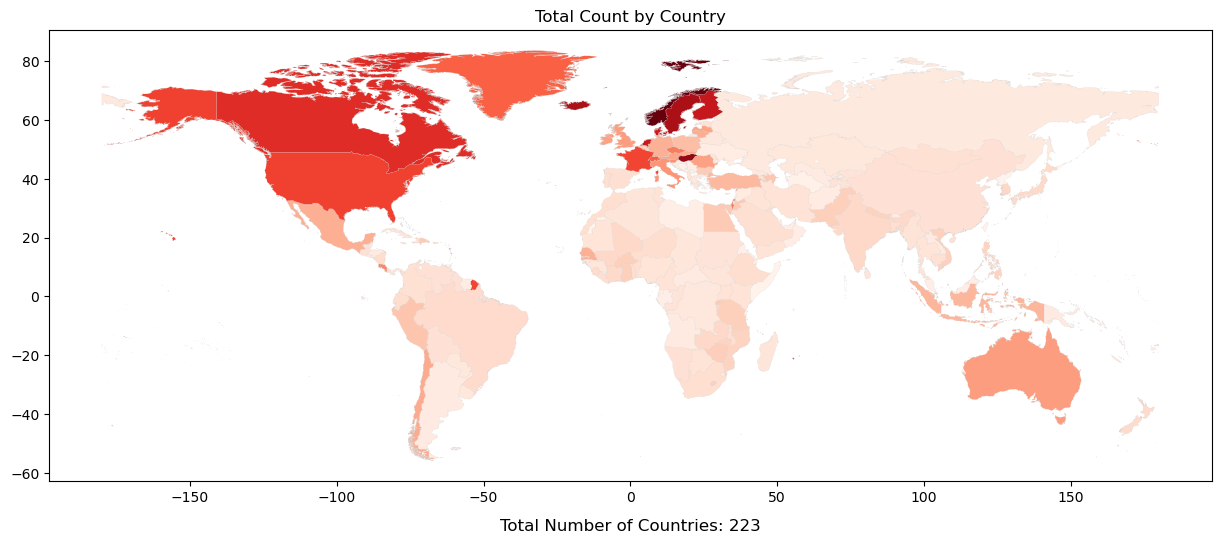

In [178]:
import matplotlib.pyplot as plt

# Calculate the total number of unique countries
total_countries = world_MAS['Country'].nunique()

# Plot Total Count by Country on a Map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

world_MAS.plot(column='Total', cmap='Reds', linewidth=0.1, ax=ax, edgecolor='0.8')

# Set the title
ax.set_title('Total Count by Country')

# Display the total number of countries as a text annotation on the map
plt.text(0.5, -0.1, f'Total Number of Countries: {total_countries}', 
         ha='center', va='center', transform=ax.transAxes, fontsize=12)

plt.show()

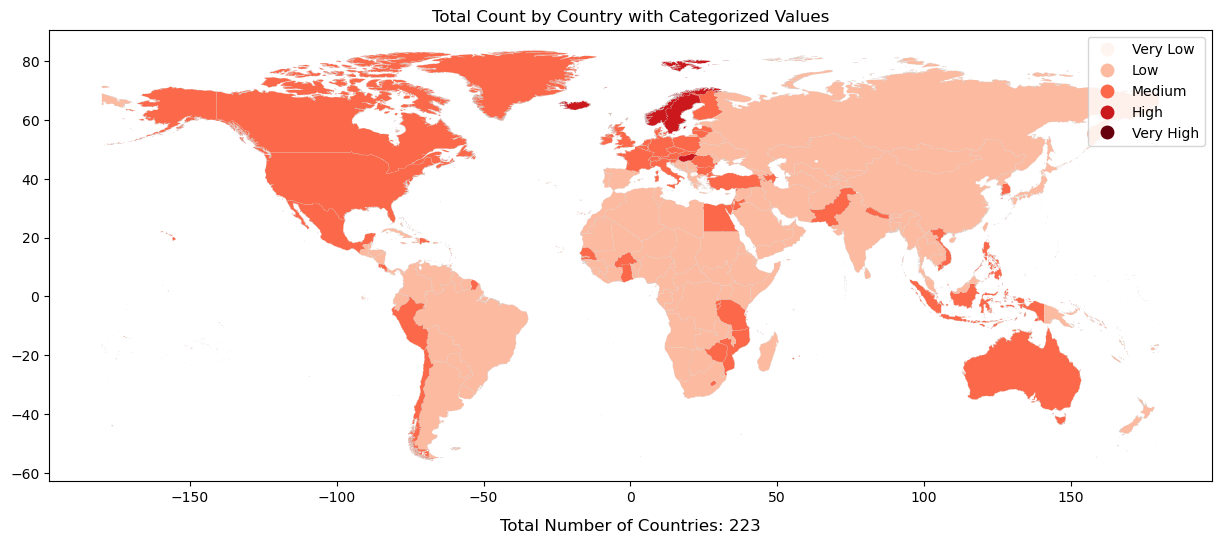

In [179]:
import matplotlib.pyplot as plt
import numpy as np

# Categorize the 'Total' values into bins (for example, low, medium, high)
bins = [0, 100, 1000, 5000, 10000, np.inf]  # Adjust the bin edges based on your data
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
world_MAS['Total_Category'] = pd.cut(world_MAS['Total'], bins=bins, labels=labels)

# Calculate the total number of unique countries
total_countries = world_MAS['Country'].nunique()

# Plot Total Count by Country on a Map with Hue based on categories
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

world_MAS.plot(column='Total_Category', cmap='Reds', linewidth=0.1, ax=ax, edgecolor='0.8', legend=True)

# Set the title
ax.set_title('Total Count by Country with Categorized Values')

# Display the total number of countries as a text annotation on the map
plt.text(0.5, -0.1, f'Total Number of Countries: {total_countries}', 
         ha='center', va='center', transform=ax.transAxes, fontsize=12)

plt.show()

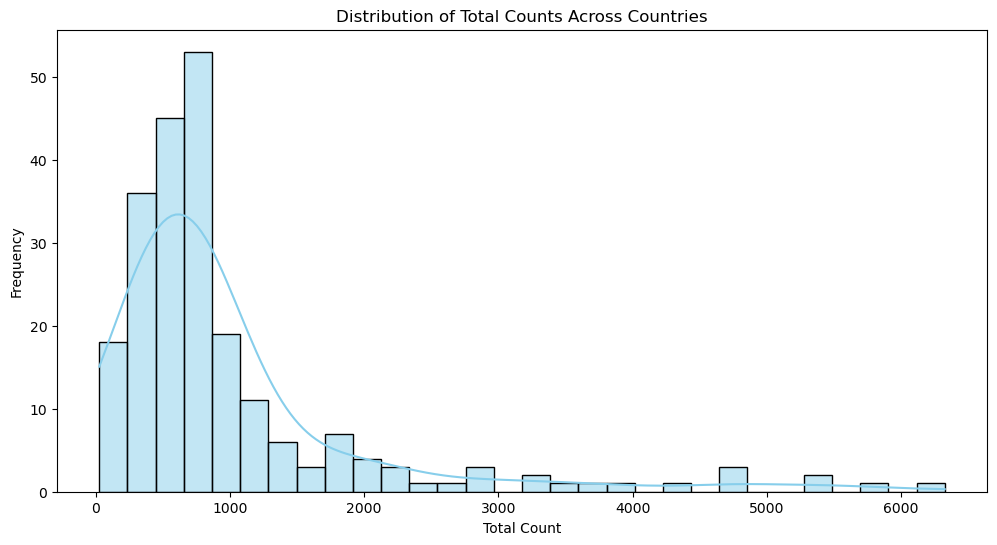

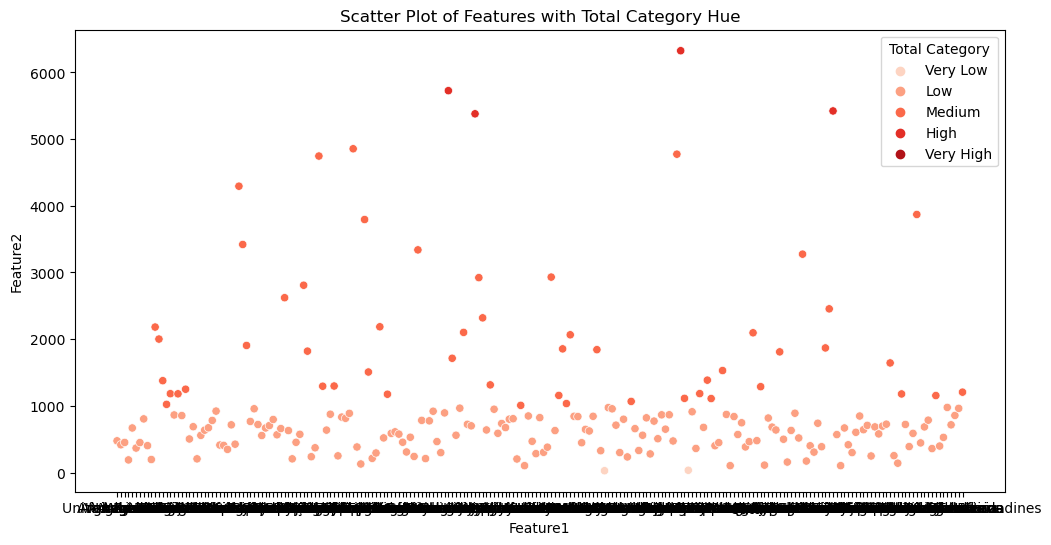

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of total counts across countries
plt.figure(figsize=(12, 6))
sns.histplot(world_MAS['Total'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Counts Across Countries')
plt.xlabel('Total Count')
plt.ylabel('Frequency')
plt.show()

# Scatter plot if you have multiple features
plt.figure(figsize=(12, 6))
sns.scatterplot(data=world_MAS, x='Country', y='Total', hue='Total_Category', palette='Reds')
plt.title('Scatter Plot of Features with Total Category Hue')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(title='Total Category')
plt.show()

In [181]:
# Check for missing values
print(world_MAS.isna().sum())

# Option 1: Drop rows with missing values
world_MAS = world_MAS.dropna(subset=['Total'])

# Option 2: Fill missing values (e.g., with mean, median, or a constant value)
# Replace missing values with the mean of the column
world_MAS['Total'] = world_MAS['Total'].fillna(world_MAS['Total'].mean())

scalerank          0
featurecla         0
LABELRANK          0
SOVEREIGNT         0
SOV_A3             0
                  ..
Divorced          32
Widowed           32
Separated         32
Total             32
Total_Category    32
Length: 74, dtype: int64


# 4. Modelling

# 4.1 K-Mean Clustering

In [182]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
cleaned_dataset = pd.read_csv("World_Marriage_Cleaned_Dataset.csv")

In [184]:
cleaned_dataset

,Country,Age Group,Sex,Marital Status,Data Process,Start Year,End Year,Data Source
0,Afghanistan,[15-19],Man,Divorced,Survey,1972,1974,National statistics
1,Afghanistan,[20-24],Man,Divorced,Survey,1972,1974,National statistics
2,Afghanistan,[25-29],Man,Divorced,Survey,1972,1974,National statistics
3,Afghanistan,[30-34],Man,Divorced,Survey,1972,1974,National statistics
4,Afghanistan,[35-39],Man,Divorced,Survey,1972,1974,National statistics
...,...,...,...,...,...,...,...,...
228211,Zimbabwe,[55-59],Woman,Widowed,Survey,2017,2017,National statistics
228212,Zimbabwe,[60-64],Woman,Widowed,Survey,2017,2017,National statistics
228213,Zimbabwe,[65-69],Woman,Widowed,Survey,2017,2017,National statistics
228214,Zimbabwe,[70-74],Woman,Widowed,Survey,2017,2017,National statistics


In [185]:
#App 1: Identifying country groups based on marriage patterns
# Select columns that may be relevant for clustering
New_Data = cleaned_dataset[['Country', 'Marital Status']]

In [186]:
New_Data

,Country,Marital Status
0,Afghanistan,Divorced
1,Afghanistan,Divorced
2,Afghanistan,Divorced
3,Afghanistan,Divorced
4,Afghanistan,Divorced
...,...,...
228211,Zimbabwe,Widowed
228212,Zimbabwe,Widowed
228213,Zimbabwe,Widowed
228214,Zimbabwe,Widowed


In [187]:
# Example: Aggregate the data by country without using percentage fields
marriage_patterns = marital_counts.groupby('Country').agg({
    'Married': 'sum', 
    'Single': 'sum',
    'Divorced': 'sum',
    'Widowed': 'sum',
    'Separated': 'sum',
}).reset_index()

In [188]:
# Example assuming each row represents an individual
cleaned_dataset['Count'] = 1

# Pivot the data
marital_counts = cleaned_dataset.pivot_table(index='Country', columns='Marital Status', values='Count', aggfunc='sum', fill_value=0).reset_index()

# Rename the columns for clarity
marital_counts.columns = ['Country', 'Divorced', 'Married', 'Single', 'Widowed','Separated']

In [189]:
marital_counts

,Country,Divorced,Married,Single,Widowed,Separated
0,Afghanistan,100,116,14,71,116
1,Albania,141,185,61,91,191
2,Algeria,129,162,57,129,160
3,American Samoa,84,86,58,90,86
4,Angola,101,95,87,48,121
...,...,...,...,...,...,...
229,Wallis and Futuna,77,152,0,156,143
230,Western Sahara,28,0,28,28,28
231,Yemen,204,205,0,102,205
232,Zambia,252,252,101,86,272


In [190]:
# Calculate the total population for each country
marital_counts['Total'] = marital_counts[['Divorced', 'Married', 'Single', 'Widowed','Separated']].sum(axis=1)

In [191]:
marital_counts

,Country,Divorced,Married,Single,Widowed,Separated,Total
0,Afghanistan,100,116,14,71,116,417
1,Albania,141,185,61,91,191,669
2,Algeria,129,162,57,129,160,637
3,American Samoa,84,86,58,90,86,404
4,Angola,101,95,87,48,121,452
...,...,...,...,...,...,...,...
229,Wallis and Futuna,77,152,0,156,143,528
230,Western Sahara,28,0,28,28,28,112
231,Yemen,204,205,0,102,205,716
232,Zambia,252,252,101,86,272,963


In [192]:
X = marital_counts

In [193]:
# Drop non-numeric columns (like 'Country')
App1 = X.drop(columns=['Country'])

In [194]:
# Check for any non-numeric columns that need encoding
print(App1.dtypes)

# If there are categorical columns, apply encoding before scaling (optional)
# Example: Suppose there's a column 'Marital_Status', encode it like this:
# X['Marital_Status'] = X['Marital_Status'].astype('category').cat.codes

# Apply StandardScaler to the numerical data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(App1)

# Perform K-Means clustering
optimal_k = 10  # Choose based on the Elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X['Cluster'] = kmeans.fit_predict(X_scaled)

# Print and visualize the results
print(X[['Country', 'Cluster']].head())

Divorced     int64
Married      int64
Single       int64
Widowed      int64
Separated    int64
Total        int64
dtype: object
          Country  Cluster
0     Afghanistan        0
1         Albania        6
2         Algeria        6
3  American Samoa        0
4          Angola        0


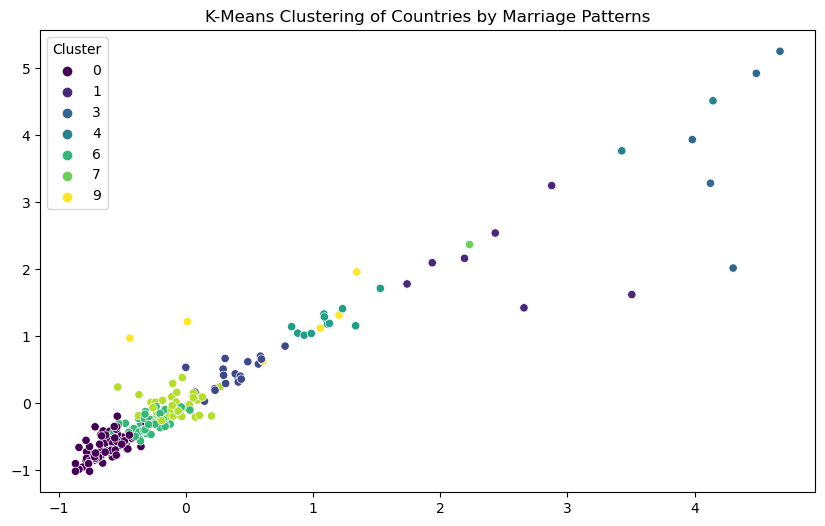

          Country  Cluster
0     Afghanistan        0
1         Albania        6
2         Algeria        6
3  American Samoa        0
4          Angola        0


In [195]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=X['Cluster'], palette='viridis')
plt.title('K-Means Clustering of Countries by Marriage Patterns')
plt.show()

# Print the clustering results
print(X[['Country', 'Cluster']].head())

TypeError: ufunc 'arctan2' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

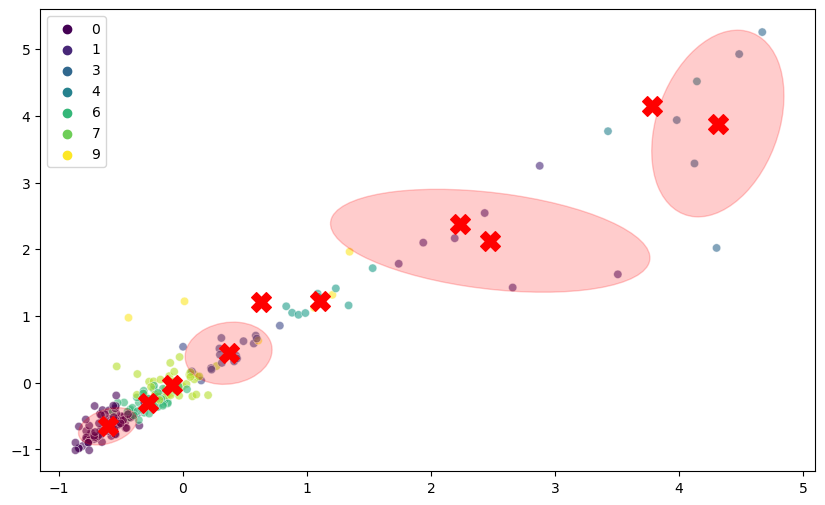

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Ellipse

# Assuming 'X_scaled' contains the scaled data and 'kmeans' is your KMeans object
centroids = kmeans.cluster_centers_
labels = X['Cluster'].values

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='viridis', alpha=0.6)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids', marker='X')

# Add ellipses for each cluster
for i in range(centroids.shape[0]):
    cluster_data = X_scaled[labels == i]
    if cluster_data.size > 0:
        # Calculate the mean and covariance
        mean = cluster_data.mean(axis=0)
        cov = np.cov(cluster_data, rowvar=False)
        
        # Calculate the ellipse parameters
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        # Ensure the eigenvalues are sorted in descending order
        order = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[order]
        eigenvectors = eigenvectors[:, order]
        
        # Create the ellipse
        angle = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0])
        ellipse = Ellipse(xy=mean, width=2 * np.sqrt(eigenvalues[0]), height=2 * np.sqrt(eigenvalues[1]),
                          angle=np.degrees(angle), color='red', alpha=0.2)
        plt.gca().add_patch(ellipse)

# Add titles and labels
plt.title('K-Means Clustering of Countries by Marriage Patterns')
plt.xlabel('Feature 1')  # Replace with appropriate feature label
plt.ylabel('Feature 2')  # Replace with appropriate feature label
plt.legend()
plt.show()

# Print the clustering results in ellipses
print("\nClustering Results:")
print("─────────────────────────────")
print(X[['Country', 'Cluster']].head().to_string(index=False))
print("─────────────────────────────")

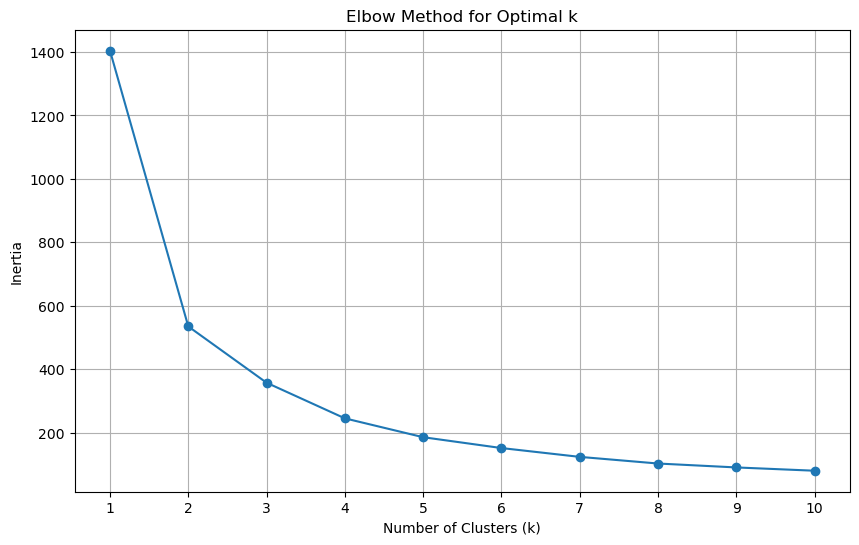

In [197]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Range of clusters to try
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

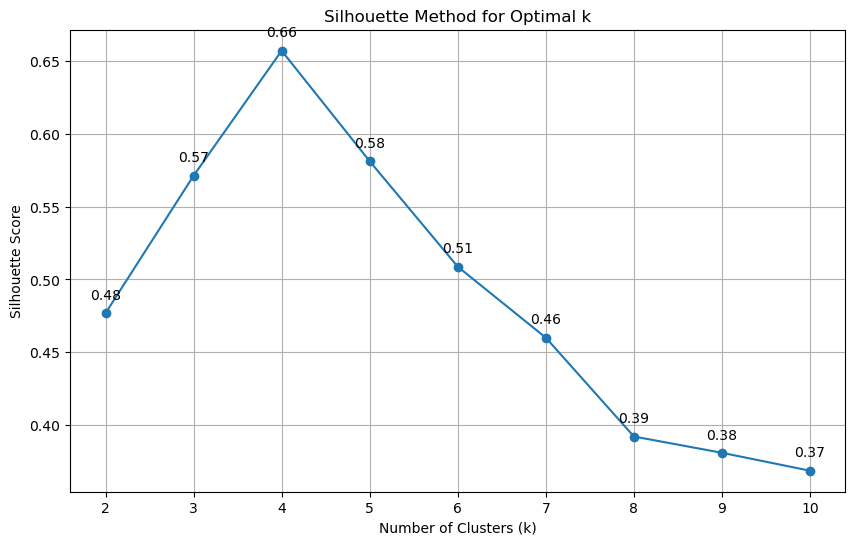

Number of clusters: 2, Silhouette Score: 0.48
Number of clusters: 3, Silhouette Score: 0.57
Number of clusters: 4, Silhouette Score: 0.66
Number of clusters: 5, Silhouette Score: 0.58
Number of clusters: 6, Silhouette Score: 0.51
Number of clusters: 7, Silhouette Score: 0.46
Number of clusters: 8, Silhouette Score: 0.39
Number of clusters: 9, Silhouette Score: 0.38
Number of clusters: 10, Silhouette Score: 0.37


In [198]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X_scaled = StandardScaler().fit_transform(X)

# Define the range of k values
k_values = range(2, 11)  # You can adjust this range as needed

silhouette_scores = []

for k in k_values:  # start from 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the Silhouette Method
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()

# Annotate each point with its silhouette score
for i, score in enumerate(silhouette_scores):
    plt.annotate(f'{score:.2f}', 
                 (k_values[i], score), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.show()

# Print the silhouette scores
for k, score in zip(k_values, silhouette_scores):
    print(f'Number of clusters: {k}, Silhouette Score: {score:.2f}')

In [199]:
#App 2: K-Means
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [200]:
# Load the dataset
df = pd.read_csv('World_Marriage_Cleaned_Dataset.csv')

In [201]:
# Verify and correct column names if needed
df.columns = df.columns.str.strip()  # Remove any leading/trailing whitespace

In [202]:
if 'Count' not in df.columns:
    df['Population_Count'] = 1

In [203]:
# Select relevant columns
columns = ['Country', 'Age Group', 'Marital Status', 'Population_Count']  # Ensure these columns exist
marriage_data = df[columns].dropna()

# Pivot the data to create a matrix for clustering
pivot_data = marriage_data.pivot_table(index='Country', columns='Age Group', values='Population_Count', fill_value=0)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot_data)

# Check scaled data shape
print(scaled_data)

[[ 6.164414   -0.18814417 -0.06551218 ...  0.28867513 -0.09284767
   0.27989465]
 [-0.16222142 -0.18814417 -0.06551218 ...  0.28867513 -0.09284767
   0.27989465]
 [-0.16222142 -0.18814417 -0.06551218 ...  0.28867513 -0.09284767
   0.27989465]
 ...
 [-0.16222142 -0.18814417 -0.06551218 ...  0.28867513 -0.09284767
   0.27989465]
 [-0.16222142 -0.18814417 -0.06551218 ...  0.28867513 -0.09284767
   0.27989465]
 [-0.16222142 -0.18814417 -0.06551218 ...  0.28867513 -0.09284767
   0.27989465]]


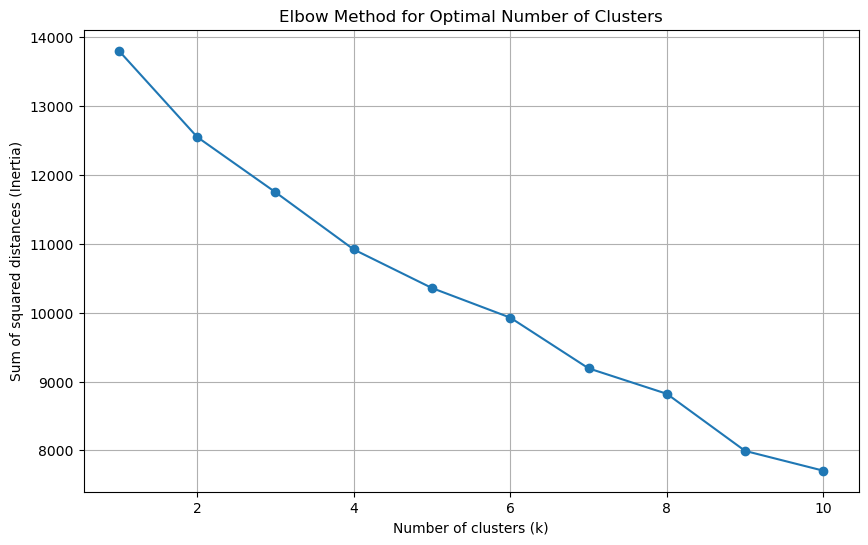

In [204]:
# Use the Elbow method to find the optimal number of clusters
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10,6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (Inertia)')
plt.grid(True)
plt.show()

In [205]:
# Apply K-Means with the optimal number of clusters (e.g., k = 4)
optimal_k = 4  # Replace with the optimal k from the Elbow graph
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to the original data
pivot_data['Cluster'] = kmeans.labels_
print(pivot_data.head())

Age Group       [0-14]  [0-15]  [0-19]  [10-14]  [10-19]  [12-14]  [12-19]  \
Country                                                                      
Afghanistan          1       0       0        1        0        0        0   
Albania              0       0       0        1        0        0        0   
Algeria              0       0       0        1        0        0        0   
American Samoa       0       0       0        1        0        0        0   
Angola               0       0       0        1        0        0        0   

Age Group       [14-19]  [15-17]  [15-19]  ...  [65+]  [65-69]  [65-74]  \
Country                                    ...                            
Afghanistan           0        0        1  ...      1        1        0   
Albania               0        0        1  ...      1        1        0   
Algeria               0        0        1  ...      1        1        0   
American Samoa        0        0        1  ...      1        1        0   
Ang

In [206]:
# Calculate the Silhouette score
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg}')

Silhouette Score for 4 clusters: 0.42536525462212244


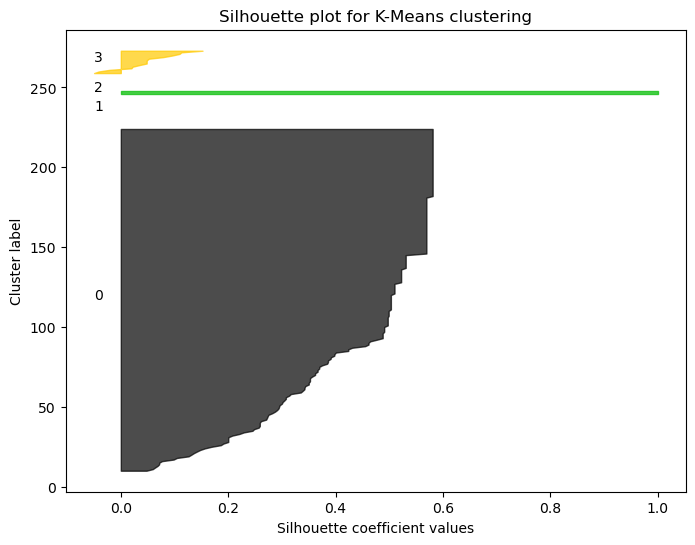

In [207]:
# Optional: Visualize Silhouette Score for each sample
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(scaled_data, kmeans.labels_)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
y_lower = 10
for i in range(optimal_k):
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / optimal_k)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title("Silhouette plot for K-Means clustering")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")
plt.show()

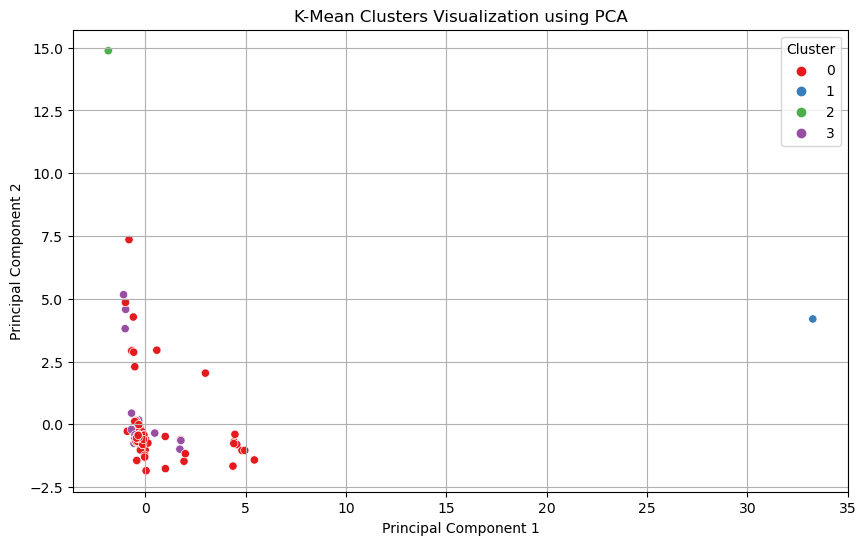

In [208]:
# Perform PCA for 2D visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA data
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans.labels_

# Plot the PCA result with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1')
plt.title('K-Mean Clusters Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# 4.2 Hierarchical Clustering

In [209]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load dataset
df = pd.read_csv('World_Marriage_Cleaned_Dataset.csv')

# Select relevant columns
df = df[['Country', 'Age Group', 'Sex', 'Marital Status']]

# One-hot encoding
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[['Country', 'Age Group', 'Sex', 'Marital Status']])

In [212]:
# Aggregate data
# For example, you might group by Country, Age Group, and Sex and calculate proportions of marital status

# Example aggregation
df_aggregated = df.groupby(['Country', 'Age Group', 'Sex', 'Marital Status']).size().unstack(fill_value=0)
df_normalized = df_aggregated.div(df_aggregated.sum(axis=1), axis=0)


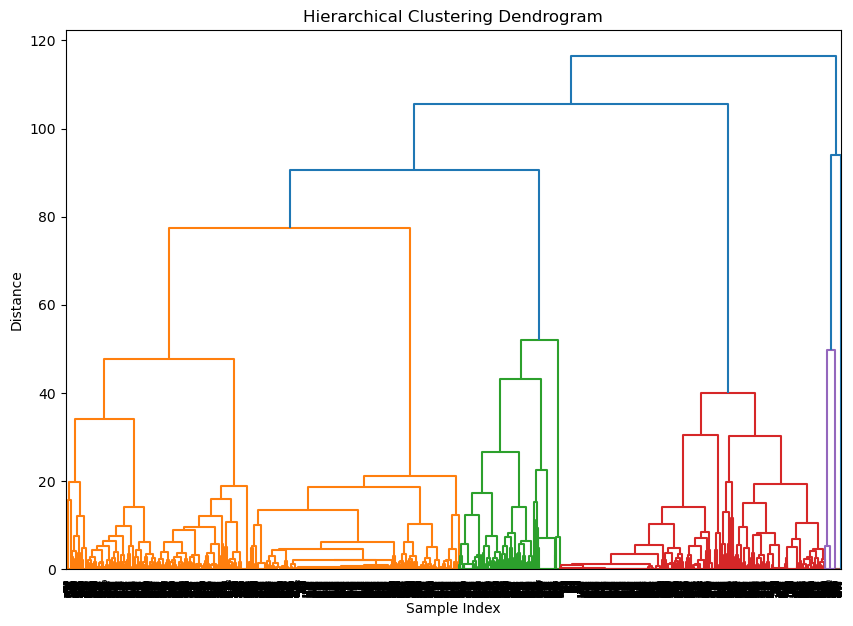

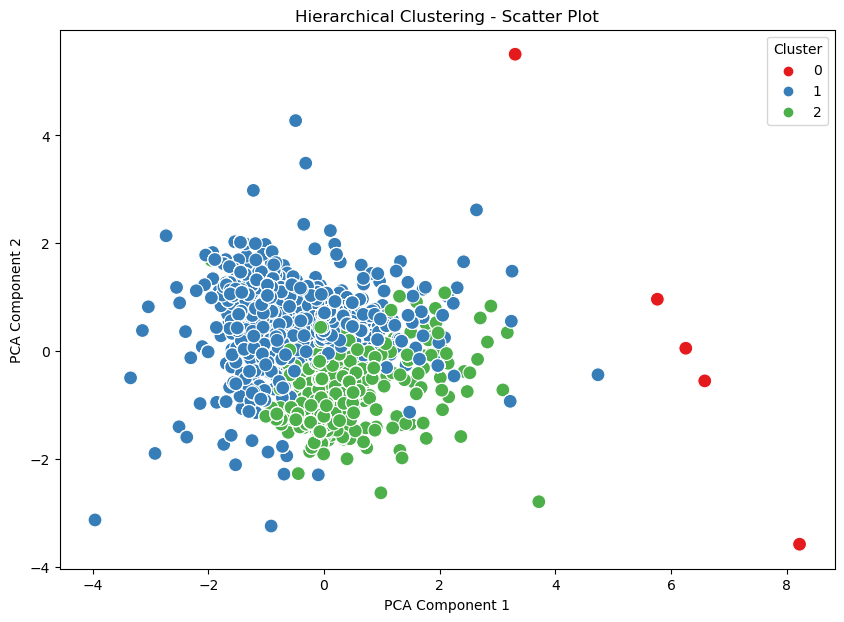

In [213]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('World_Marriage_Cleaned_Dataset.csv')

# Select relevant columns
df = df[['Country', 'Age Group', 'Sex', 'Marital Status']]

# One-hot encoding for categorical variables
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df[['Country', 'Age Group', 'Sex', 'Marital Status']])

# Convert encoded features back to a DataFrame and ensure the correct length
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Country', 'Age Group', 'Sex', 'Marital Status']))

# Concatenate the encoded features back with the original DataFrame (optional)
# df_encoded = pd.concat([df.reset_index(drop=True), encoded_df], axis=1)

# Aggregation step - ensure the aggregation is compatible with encoded data
# Example: Group by 'Country', 'Age Group', and 'Sex' and calculate counts for marital status
df_aggregated = df.groupby(['Country', 'Age Group', 'Sex', 'Marital Status']).size().unstack(fill_value=0)

# Normalize the aggregated data
df_normalized = df_aggregated.div(df_aggregated.sum(axis=1), axis=0)

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_normalized)

# Perform hierarchical clustering
linked = linkage(scaled_features, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Use Agglomerative Clustering to fit the data
n_clusters = 3  # You can adjust this number
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
df_normalized['Cluster'] = hc.fit_predict(scaled_features)

# Reduce dimensionality to 2D using PCA for scatter plot visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
df_normalized['PCA1'] = pca_result[:, 0]
df_normalized['PCA2'] = pca_result[:, 1]

# Plot the clusters in a scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_normalized, palette='Set1', s=100, marker='o')
plt.title('Hierarchical Clustering - Scatter Plot')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.savefig('Hierarchical Clustering')
plt.show()


# App 2: Analyze marriage patterns evolution with algorithms.

Number of features: 5


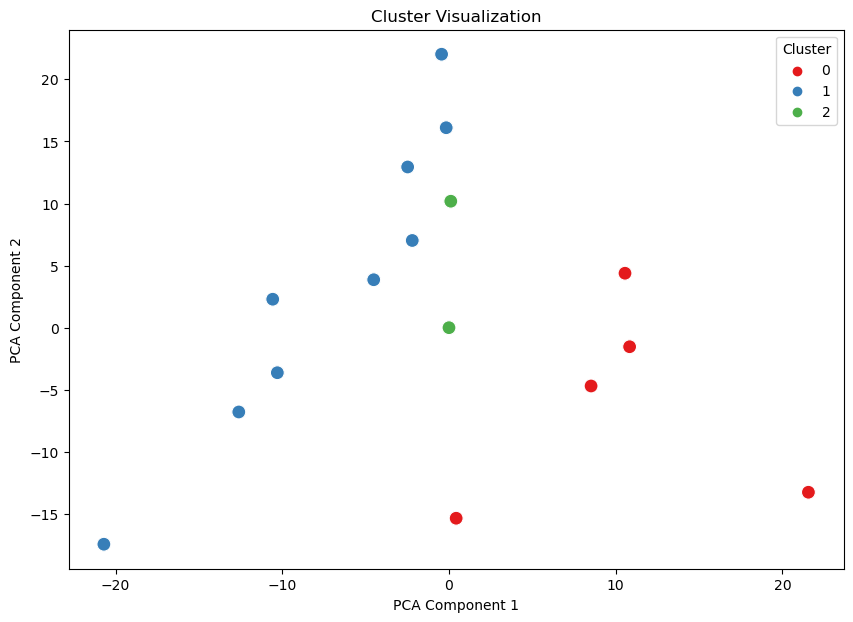

In [214]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.cluster import MiniBatchKMeans
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('World_Marriage_Cleaned_Dataset.csv')

# Downsample the dataset
df_sampled = df.sample(frac=0.01, random_state=42)

# Convert data types to more memory-efficient types
df_sampled['Start Year'] = pd.to_numeric(df_sampled['Start Year'], errors='coerce', downcast='integer')
df_sampled['Age Group'] = df_sampled['Age Group'].astype('category')
df_sampled['Sex'] = df_sampled['Sex'].astype('category')
df_sampled['Marital Status'] = df_sampled['Marital Status'].astype('category')

# Aggregate data
df_aggregated = df_sampled.groupby(['Country', 'Age Group', 'Start Year', 'Marital Status']).size().unstack(fill_value=0)

# Normalize the aggregated data
df_normalized = df_aggregated.div(df_aggregated.sum(axis=1), axis=0).fillna(0)

# Convert to sparse matrix
sparse_features = csr_matrix(df_normalized.values)

# Check number of features
num_features = sparse_features.shape[1]
print(f'Number of features: {num_features}')

# Apply dimensionality reduction
n_components = min(5, num_features)  # Adjust n_components based on the number of features
svd = TruncatedSVD(n_components=n_components)
reduced_features = svd.fit_transform(sparse_features)

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(reduced_features)

# Perform clustering using MiniBatchKMeans
n_clusters = 3  # Adjust this number based on your analysis
kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
df_aggregated['Cluster'] = kmeans.fit_predict(scaled_features)

# Reduce dimensionality to 2D for scatter plot
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
df_aggregated['PCA1'] = pca_result[:, 0]
df_aggregated['PCA2'] = pca_result[:, 1]

# Plot the clusters in a scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_aggregated, palette='Set1', s=100, marker='o')
plt.title('Cluster Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


In [431]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [215]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import MiniBatchKMeans
from scipy.sparse import csr_matrix
from sklearn.metrics import silhouette_score

# Load dataset in chunks
chunk_size = 100000  # Adjust based on memory capacity
chunks = pd.read_csv('World_Marriage_Cleaned_Dataset.csv', chunksize=chunk_size)

# Initialize an empty DataFrame for aggregation
df_aggregated = pd.DataFrame()

for chunk in chunks:
    # Convert data types
    chunk['Start Year'] = pd.to_numeric(chunk['Start Year'], errors='coerce', downcast='integer')
    chunk['Age Group'] = chunk['Age Group'].astype('category')
    chunk['Sex'] = chunk['Sex'].astype('category')
    chunk['Marital Status'] = chunk['Marital Status'].astype('category')

    # Aggregate data in the chunk
    chunk_aggregated = chunk.groupby(['Country', 'Age Group', 'Start Year', 'Marital Status']).size().unstack(fill_value=0)
    
    # Concatenate chunk with aggregated DataFrame
    df_aggregated = pd.concat([df_aggregated, chunk_aggregated])

# Drop duplicates and fill NaN values
df_aggregated = df_aggregated.groupby(level=0).sum()
df_normalized = df_aggregated.div(df_aggregated.sum(axis=1), axis=0).fillna(0)

# Convert to sparse matrix
sparse_features = csr_matrix(df_normalized.values)

# Apply dimensionality reduction
n_components = min(5, sparse_features.shape[1])
svd = TruncatedSVD(n_components=n_components)
reduced_features = svd.fit_transform(sparse_features)

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(reduced_features)

# Perform MiniBatchKMeans clustering
n_clusters = 10  # Adjust number of clusters as needed
kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=10000)
clusters = kmeans.fit_predict(scaled_features)

# Evaluate clustering (optional)
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.33236253509218044


# 4.3 DBSCAN Clustering


In [216]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [217]:
cleaned_dataset = pd.read_csv("World_Marriage_Cleaned_Dataset.csv")

In [218]:
# Verify and correct column names if needed
cleaned_dataset.columns = cleaned_dataset.columns.str.strip()  # Remove any leading/trailing whitespace

In [219]:
if 'Count' not in cleaned_dataset.columns:
    cleaned_dataset['Count'] = 1

In [220]:
# Extract relevant columns for all age groups
relevant_data = cleaned_dataset[['Country', 'Marital Status', 'Count']]

# Pivot the data to get counts per country and age group
DBSCAN_pivot = relevant_data.pivot_table(index='Country', columns='Marital Status', values='Count', aggfunc='sum', fill_value=0).reset_index()

# Print columns to confirm
print(DBSCAN_pivot.columns)

# Show the first few rows to inspect
print(DBSCAN_pivot.head())

Index(['Country', 'Divorced', 'Married', 'Separated', 'Single', 'Widowed'], dtype='object', name='Marital Status')
Marital Status         Country  Divorced  Married  Separated  Single  Widowed
0                  Afghanistan       100      116         14      71      116
1                      Albania       141      185         61      91      191
2                      Algeria       129      162         57     129      160
3               American Samoa        84       86         58      90       86
4                       Angola       101       95         87      48      121


In [221]:
# Count the total number of people for each country
DBSCAN_pivot['Total_People'] = DBSCAN_pivot.drop(columns='Country').sum(axis=1)

# Show the updated pivot table with total counts
print(DBSCAN_pivot.head())

Marital Status         Country  Divorced  Married  Separated  Single  Widowed  \
0                  Afghanistan       100      116         14      71      116   
1                      Albania       141      185         61      91      191   
2                      Algeria       129      162         57     129      160   
3               American Samoa        84       86         58      90       86   
4                       Angola       101       95         87      48      121   

Marital Status  Total_People  
0                        417  
1                        669  
2                        637  
3                        404  
4                        452  


In [222]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
X = DBSCAN_pivot.drop(columns=['Country', 'Total_People'])  # Dropping Country and Total_People for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [223]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
clusters = dbscan.fit_predict(X_scaled)

# Add cluster labels to the dataset
DBSCAN_pivot['Cluster'] = clusters

In [224]:
print(DBSCAN_pivot.columns)

Index(['Country', 'Divorced', 'Married', 'Separated', 'Single', 'Widowed',
       'Total_People', 'Cluster'],
      dtype='object', name='Marital Status')


In [225]:
# Evaluate clustering - Cluster labels distribution
print("Cluster labels distribution:")
print(DBSCAN_pivot['Cluster'].value_counts())

Cluster labels distribution:
 0    198
-1     29
 1      7
Name: Cluster, dtype: int64


Cluster labels distribution:
 0    198
-1     29
 1      7
Name: Cluster, dtype: int64


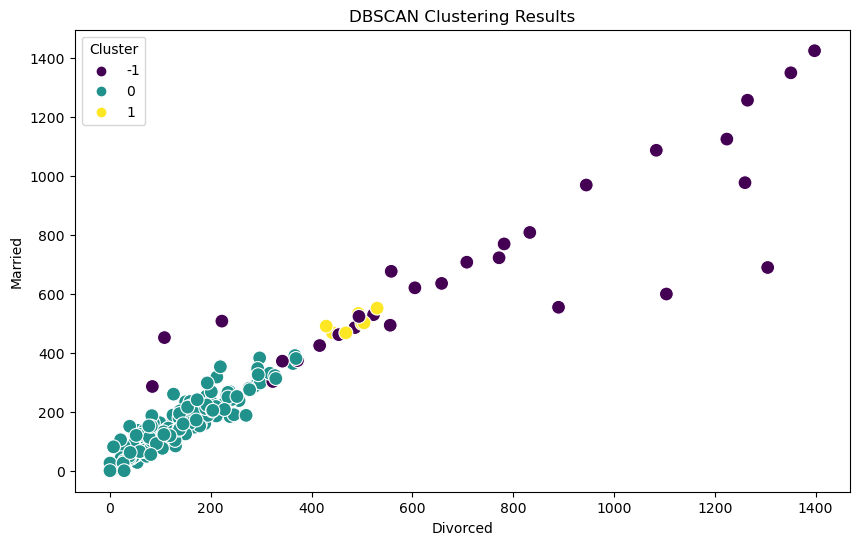

In [226]:
# Add cluster labels to the dataset
DBSCAN_pivot['Cluster'] = clusters

# Evaluate clustering - Cluster labels distribution
print("Cluster labels distribution:")
print(DBSCAN_pivot['Cluster'].value_counts())

# Visualization using two marital statuses (adjust the column names accordingly)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=DBSCAN_pivot[DBSCAN_pivot.columns[1]], y=DBSCAN_pivot[DBSCAN_pivot.columns[2]], hue=DBSCAN_pivot['Cluster'], palette='viridis', s=100)
plt.title('DBSCAN Clustering Results')
plt.xlabel(DBSCAN_pivot.columns[1])
plt.ylabel(DBSCAN_pivot.columns[2])
plt.legend(title='Cluster')
plt.show()

In [227]:
outliers = DBSCAN_pivot[DBSCAN_pivot['Cluster'] == -1]
print("Outliers:")
print(outliers)

Outliers:
Marital Status                   Country  Divorced  Married  Separated  \
10                             Australia       486      486        236   
33                                Canada      1104      600        332   
39                                 Chile       108      452        442   
41                              Colombia        84      286         48   
44                            Costa Rica       523      530        523   
49                        Czech Republic       708      708          0   
51                               Denmark      1305      690        140   
64                         Faroe Islands       323      303        237   
67                               Finland      1224     1126         56   
68                                France       945      970          0   
78                             Greenland       890      555         56   
89                               Hungary      1398     1426         54   
90                          

Cluster labels distribution (without outliers):
0    198
1      7
Name: Cluster, dtype: int64


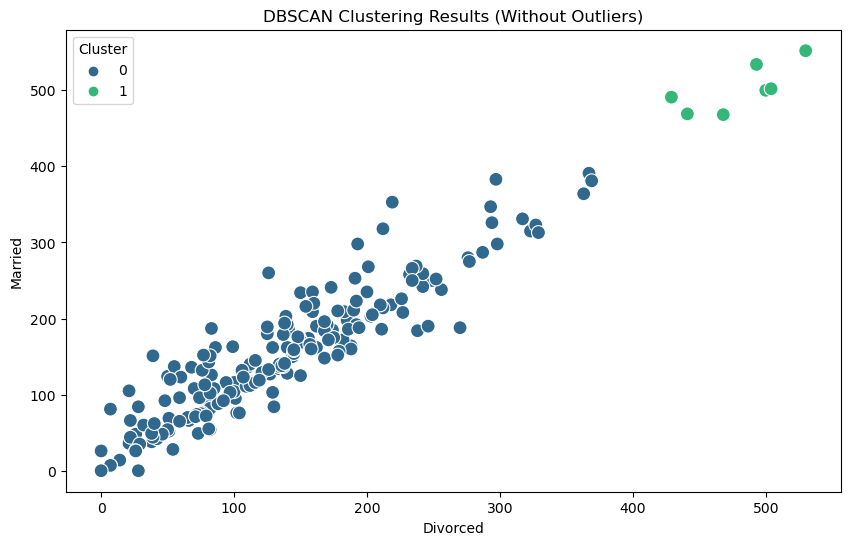

In [228]:
# Add cluster labels to the dataset
DBSCAN_pivot['Cluster'] = clusters

# Remove outliers (DBSCAN labels outliers as -1)
DBSCAN_no_outliers = DBSCAN_pivot[DBSCAN_pivot['Cluster'] != -1]

# Evaluate clustering - Cluster labels distribution without outliers
print("Cluster labels distribution (without outliers):")
print(DBSCAN_no_outliers['Cluster'].value_counts())

# Visualization without outliers using two marital statuses (adjust the column names accordingly)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=DBSCAN_no_outliers[DBSCAN_no_outliers.columns[1]], 
    y=DBSCAN_no_outliers[DBSCAN_no_outliers.columns[2]], 
    hue=DBSCAN_no_outliers['Cluster'], 
    palette='viridis', 
    s=100
)
plt.title('DBSCAN Clustering Results (Without Outliers)')
plt.xlabel(DBSCAN_no_outliers.columns[1])
plt.ylabel(DBSCAN_no_outliers.columns[2])
plt.legend(title='Cluster')
plt.show()

In [229]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map from Natural Earth (this approach should work with newer versions)
shapefile_path = r"C:/Users/user/Desktop/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp"

# Load the shapefile
world = gpd.read_file(shapefile_path)

# Check the columns
print(world.columns)

world

Index(['scalerank', 'featurecla', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT', 'NAME_ALT',
       'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST',
       'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS', 'GDP_YEAR', 'ECONOMY',
       'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2', 'ISO_A3', 'ISO_N3',
       'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE',
       'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN', 'ADM0_A3_WB', 'CONTINENT',
       'REGION_UN', 'SUBREGION', 'REGION_WB', 'NAME_LEN', 'LONG_LEN',
       'ABBREV_LEN', 'TINY', 'HOMEPART', 'geometry'],
      dtype='object')


,scalerank,featurecla,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,geometry
0,3,Admin-0 country,5.0,Netherlands,NL1,1.0,2.0,Country,Aruba,ABW,...,North America,Americas,Caribbean,Latin America & Caribbean,5.0,5.0,5.0,4.0,-99.0,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,0,Admin-0 country,3.0,Afghanistan,AFG,0.0,2.0,Sovereign country,Afghanistan,AFG,...,Asia,Asia,Southern Asia,South Asia,11.0,11.0,4.0,-99.0,1.0,"POLYGON ((71.0498 38.40866, 71.05714 38.40903,..."
2,0,Admin-0 country,3.0,Angola,AGO,0.0,2.0,Sovereign country,Angola,AGO,...,Africa,Africa,Middle Africa,Sub-Saharan Africa,6.0,6.0,4.0,-99.0,1.0,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,3,Admin-0 country,6.0,United Kingdom,GB1,1.0,2.0,Dependency,Anguilla,AIA,...,North America,Americas,Caribbean,Latin America & Caribbean,8.0,8.0,4.0,-99.0,-99.0,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,0,Admin-0 country,6.0,Albania,ALB,0.0,2.0,Sovereign country,Albania,ALB,...,Europe,Europe,Southern Europe,Europe & Central Asia,7.0,7.0,4.0,-99.0,1.0,"POLYGON ((19.74777 42.5789, 19.74601 42.57993,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,3,Admin-0 country,4.0,Samoa,WSM,0.0,2.0,Sovereign country,Samoa,WSM,...,Oceania,Oceania,Polynesia,East Asia & Pacific,5.0,5.0,5.0,-99.0,1.0,"MULTIPOLYGON (((-171.57002 -13.93816, -171.564..."
251,0,Admin-0 country,3.0,Yemen,YEM,0.0,2.0,Sovereign country,Yemen,YEM,...,Asia,Asia,Western Asia,Middle East & North Africa,5.0,5.0,4.0,-99.0,1.0,"MULTIPOLYGON (((53.30824 12.11839, 53.31027 12..."
252,0,Admin-0 country,2.0,South Africa,ZAF,0.0,2.0,Sovereign country,South Africa,ZAF,...,Africa,Africa,Southern Africa,Sub-Saharan Africa,12.0,12.0,5.0,-99.0,1.0,"MULTIPOLYGON (((37.86378 -46.94085, 37.83644 -..."
253,0,Admin-0 country,3.0,Zambia,ZMB,0.0,2.0,Sovereign country,Zambia,ZMB,...,Africa,Africa,Eastern Africa,Sub-Saharan Africa,6.0,6.0,6.0,-99.0,1.0,"POLYGON ((31.11984 -8.61663, 31.14102 -8.60619..."


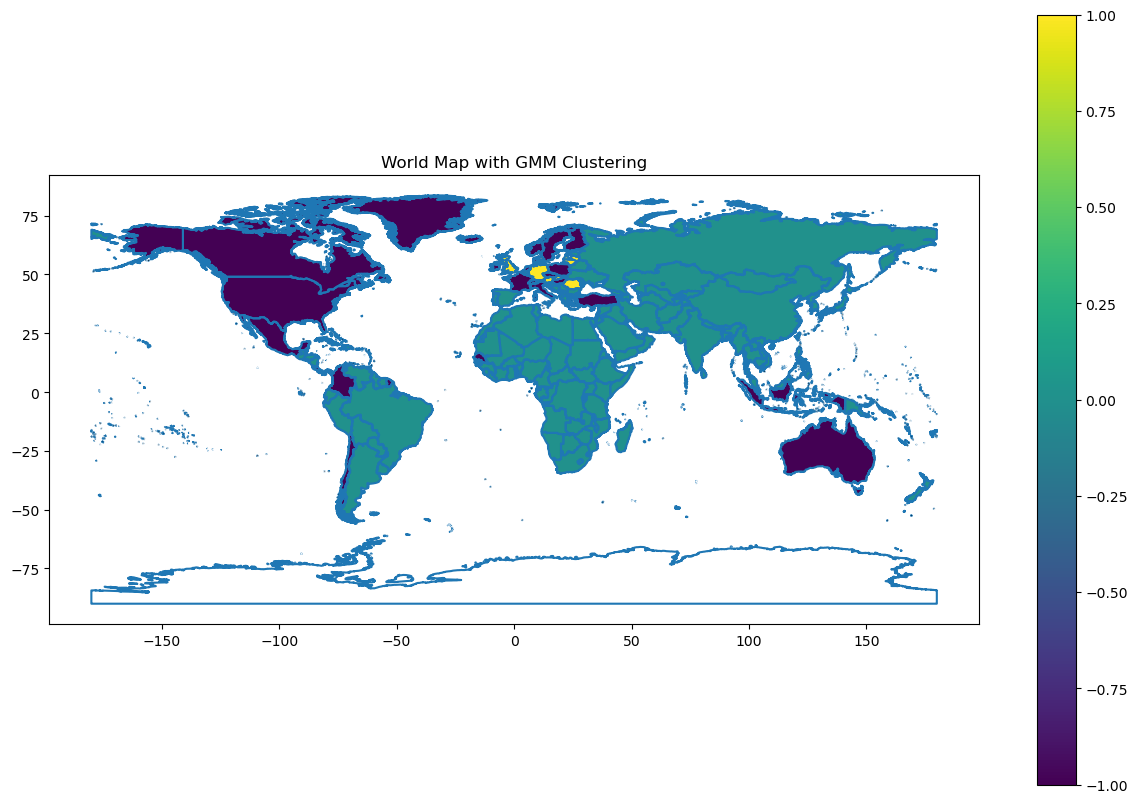

In [230]:
# Merge with clustering results
world_clusters = world.merge(DBSCAN_pivot[['Country', 'Cluster']], how='left', left_on='ADMIN', right_on='Country')

# Plot the world map with clusters
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world_clusters.plot(column='Cluster', ax=ax, legend=True, cmap='viridis', edgecolor='k', linewidth=0.5)
plt.title('World Map with GMM Clustering')
plt.show()

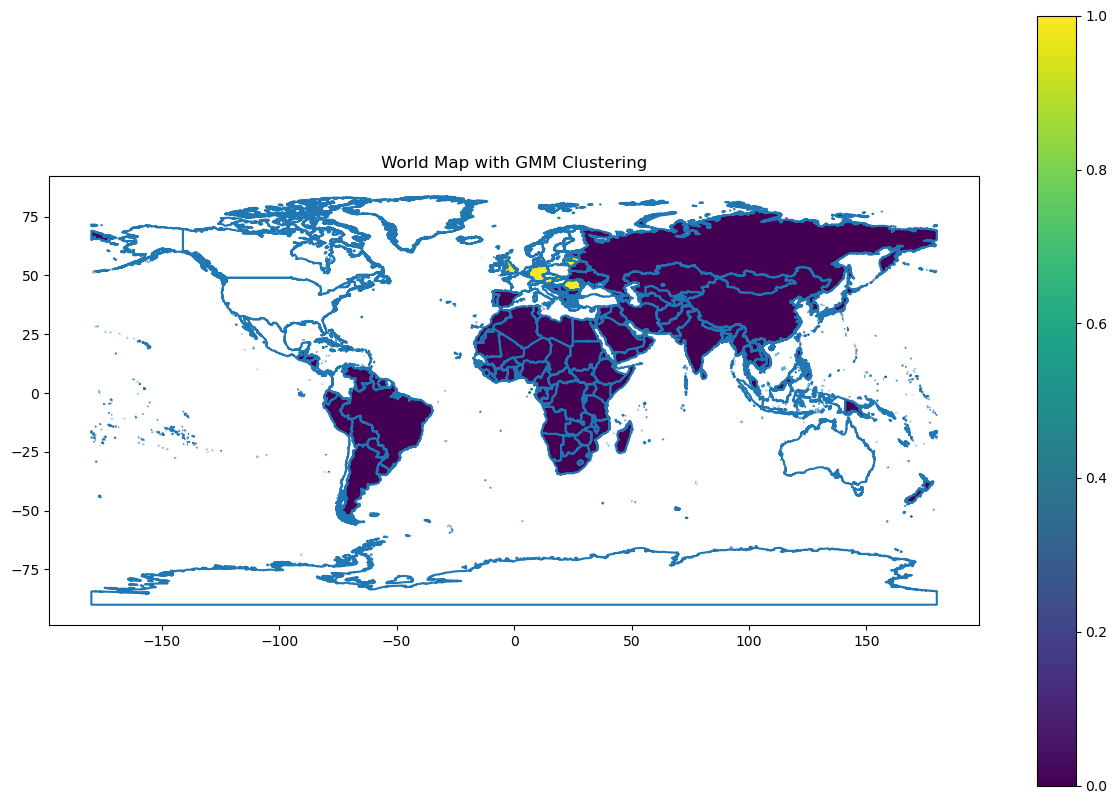

In [231]:
# Merge with clustering results
world_clusters = world.merge(DBSCAN_no_outliers[['Country', 'Cluster']], how='left', left_on='ADMIN', right_on='Country')

# Plot the world map with clusters
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world_clusters.plot(column='Cluster', ax=ax, legend=True, cmap='viridis', edgecolor='k', linewidth=0.5)
plt.title('World Map with GMM Clustering')
plt.show()

# App 2

In [232]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import seaborn as sns

In [233]:
data = pd.read_csv("World_Marriage_Cleaned_Dataset.csv")

In [234]:
if 'Count' not in data.columns:
    data['Count'] = 1

In [235]:
# Select relevant columns (Assuming you have 'Country', 'Age Group', 'Marital Status' and 'Count')
df = data[['Country', 'Age Group', 'Marital Status', 'Count']]

# Pivot data to have Age Group as columns for clustering
pivot_df = df.pivot_table(index='Country', columns='Age Group', values='Count', fill_value=0).reset_index()

# Drop the country column for clustering
X = pivot_df.drop('Country', axis=1)

# Standardize the data for better DBSCAN performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [236]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples based on the data
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add the DBSCAN cluster labels to the original dataframe
pivot_df['Cluster'] = dbscan_labels

Average Silhouette Score for DBSCAN: 0.32677868141256244


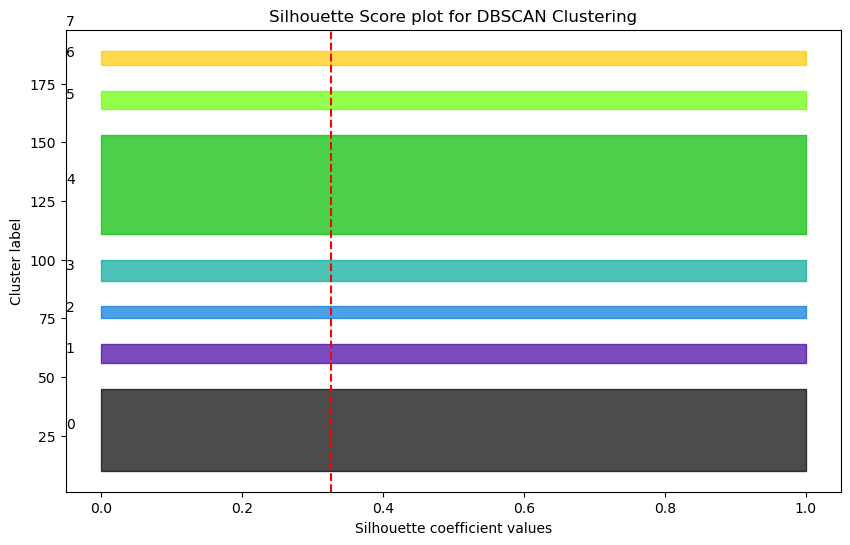

In [237]:
# Step 4: Use Silhouette Score to evaluate clustering quality
if len(set(dbscan.labels_)) > 1:  # Check if we have more than 1 cluster
    silhouette_avg = silhouette_score(X_scaled, dbscan.labels_)
    print(f"Average Silhouette Score for DBSCAN: {silhouette_avg}")
    
    # Silhouette samples for each point
    sample_silhouette_values = silhouette_samples(X_scaled, dbscan.labels_)
    
    # Plot Silhouette scores
    plt.figure(figsize=(10, 6))
    y_lower = 10
    for i in range(len(set(dbscan.labels_))):
        ith_cluster_silhouette_values = sample_silhouette_values[dbscan.labels_ == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.nipy_spectral(float(i) / len(set(dbscan.labels_)))
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.title("Silhouette Score plot for DBSCAN Clustering")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.show()

else:
    print("DBSCAN resulted in 1 or fewer clusters, silhouette score is not applicable.")

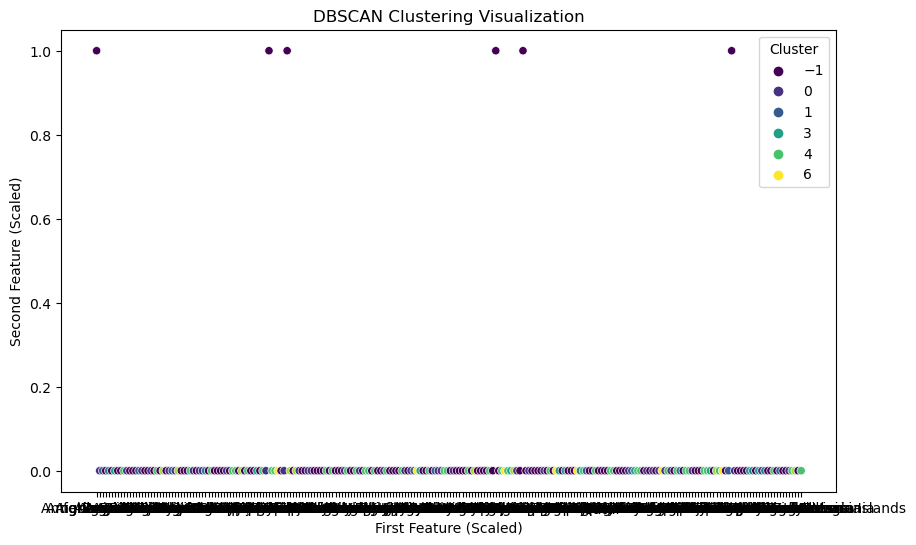

In [238]:
# Step 5: Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pivot_df.iloc[:, 0], y=pivot_df.iloc[:, 1], hue=pivot_df['Cluster'], palette="viridis")
plt.title("DBSCAN Clustering Visualization")
plt.xlabel('First Feature (Scaled)')
plt.ylabel('Second Feature (Scaled)')
plt.show()

# 4.4 GMM Clustering

In [239]:
# import required libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import random
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


warnings.filterwarnings('ignore')

In [240]:
cleaned_dataset = pd.read_csv("World_Marriage_Cleaned_Dataset.csv")

In [241]:
# Verify and correct column names if needed
cleaned_dataset.columns = cleaned_dataset.columns.str.strip()  # Remove any leading/trailing whitespace

if 'Count' not in cleaned_dataset.columns:
    cleaned_dataset['Count'] = 1

# Extract relevant columns for all age groups
relevant_data = cleaned_dataset[['Country', 'Age Group', 'Marital Status', 'Count']]

# Pivot the data to get counts per country and age group
marital_pivot = relevant_data.pivot_table(index='Country', columns='Marital Status', values='Count', aggfunc='sum', fill_value=0).reset_index()

# Print columns to confirm
print(marital_pivot.columns)

# Show the first few rows to inspect
print(marital_pivot.head())

Index(['Country', 'Divorced', 'Married', 'Separated', 'Single', 'Widowed'], dtype='object', name='Marital Status')
Marital Status         Country  Divorced  Married  Separated  Single  Widowed
0                  Afghanistan       100      116         14      71      116
1                      Albania       141      185         61      91      191
2                      Algeria       129      162         57     129      160
3               American Samoa        84       86         58      90       86
4                       Angola       101       95         87      48      121


In [242]:
print("Features shape:", features.shape)
print("Marital pivot shape:", marital_pivot.shape)

Features shape: (223, 1)
Marital pivot shape: (234, 6)


In [243]:
# Initialize and fit GMM
gmm = GaussianMixture(n_components=5, random_state=0)  # Adjust n_components as needed
gmm.fit(features)

# Predict clusters
clusters = gmm.predict(features)

In [244]:
features = marital_pivot.drop(columns=['Country'])  # Make sure 'Country' column is excluded

In [245]:
gmm.fit(features)
clusters = gmm.predict(features)

In [246]:
print("Length of clusters:", len(clusters))
print("Number of rows in marital_pivot:", len(marital_pivot))

Length of clusters: 234
Number of rows in marital_pivot: 234


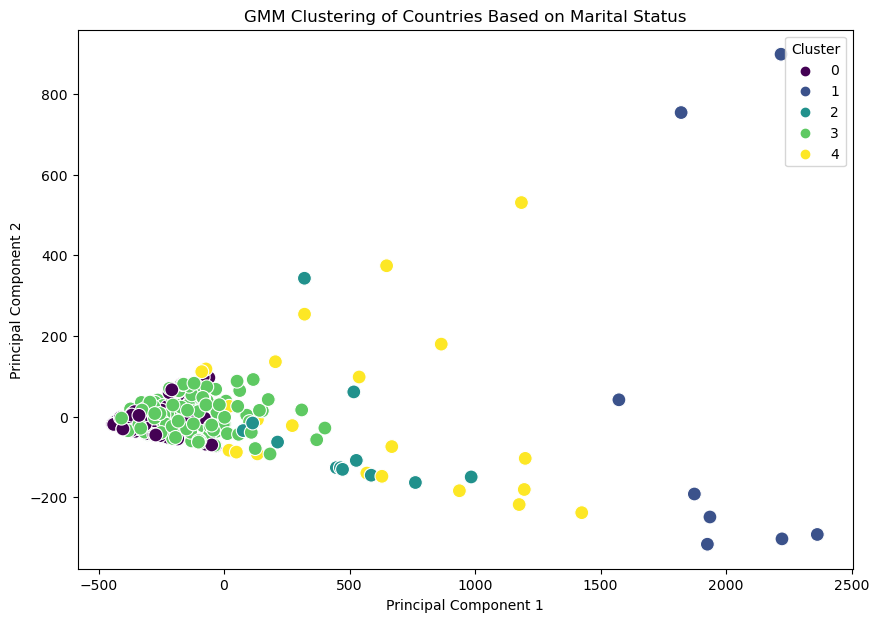

In [247]:
# Add cluster labels to the original DataFrame
marital_pivot['Cluster'] = clusters

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

# Create a DataFrame for plotting
plot_df = pd.DataFrame(reduced_features, columns=['PC1', 'PC2'])
plot_df['Cluster'] = clusters
plot_df['Country'] = marital_pivot['Country']

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=plot_df, palette='viridis', s=100)
plt.title('GMM Clustering of Countries Based on Marital Status')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

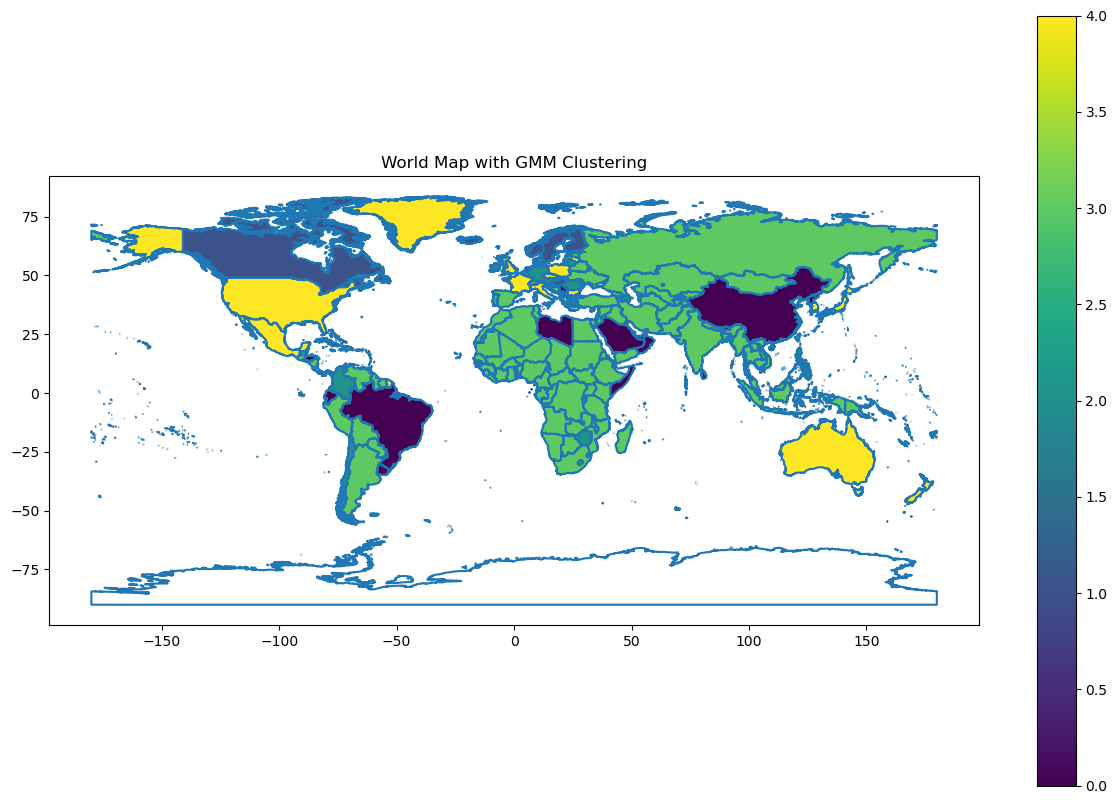

In [248]:
# Merge with clustering results
world_clusters = world.merge(marital_pivot[['Country', 'Cluster']], how='left', left_on='ADMIN', right_on='Country')

# Plot the world map with clusters
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world_clusters.plot(column='Cluster', ax=ax, legend=True, cmap='viridis', edgecolor='k', linewidth=0.5)
plt.title('World Map with GMM Clustering')
plt.show()

In [249]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(features, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.04074134517951543


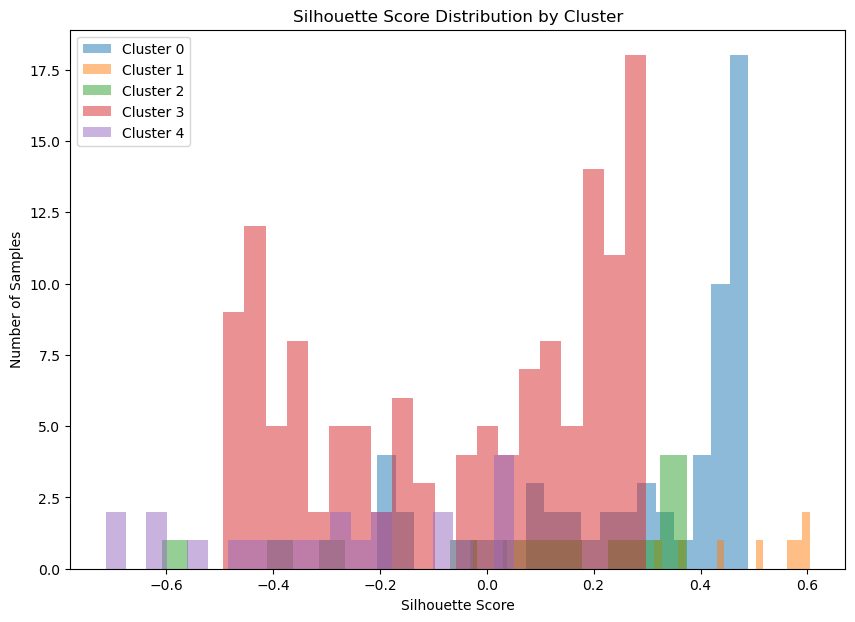

In [250]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples
import numpy as np

# Compute the silhouette scores for each sample
silhouette_vals = silhouette_samples(features, clusters)

# Plot the silhouette scores
plt.figure(figsize=(10, 7))

# Silhouette plot for each cluster
unique_clusters = np.unique(clusters)
for cluster in unique_clusters:
    cluster_silhouette_vals = silhouette_vals[clusters == cluster]
    plt.hist(cluster_silhouette_vals, bins=20, alpha=0.5, label=f'Cluster {cluster}')

plt.title('Silhouette Score Distribution by Cluster')
plt.xlabel('Silhouette Score')
plt.ylabel('Number of Samples')
plt.legend()
plt.show()

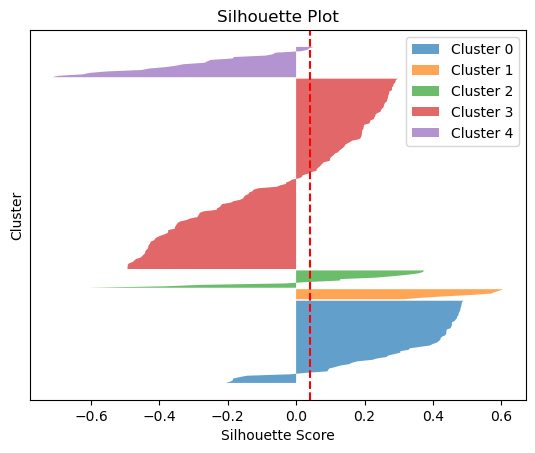

In [251]:
import matplotlib.pyplot as plt
from matplotlib.collections import PathCollection

def plot_silhouette(X, y_pred):
    # Compute silhouette scores
    silhouette_vals = silhouette_samples(X, y_pred)
    y_lower, y_upper = 0, 0
    for i in np.unique(y_pred):
        # Aggregate the silhouette scores for samples belonging to cluster i
        cluster_silhouette_vals = silhouette_vals[y_pred == i]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.7, label=f'Cluster {i}')
        y_lower += len(cluster_silhouette_vals)
    
    plt.title('Silhouette Plot')
    plt.xlabel('Silhouette Score')
    plt.ylabel('Cluster')
    plt.yticks([])
    plt.axvline(x=silhouette_avg, color='red', linestyle='--')
    plt.legend()
    plt.show()

# Use the function to plot
plot_silhouette(features, clusters)

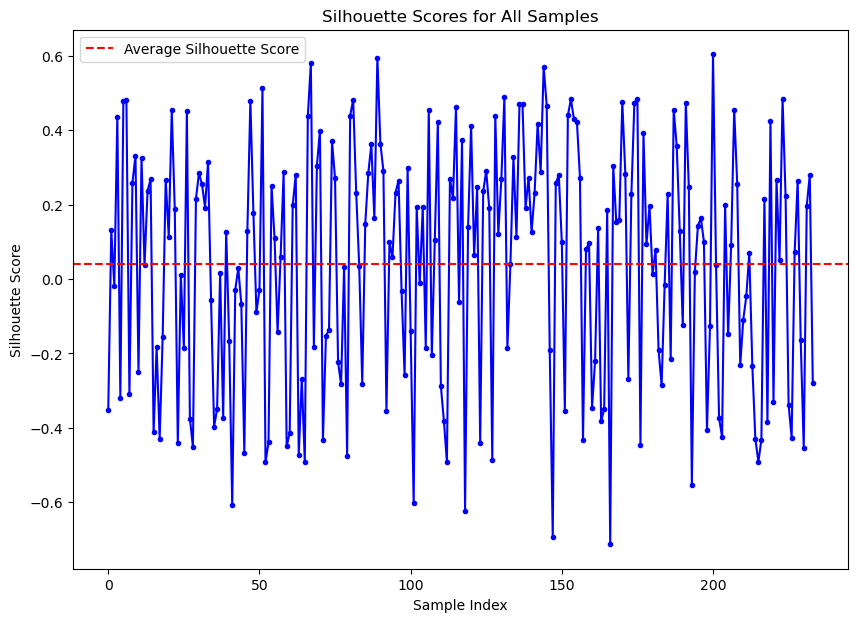

In [252]:
# Create a figure
plt.figure(figsize=(10, 7))

# Plot silhouette scores for all samples
plt.plot(np.arange(len(silhouette_vals)), silhouette_vals, color='blue', marker='o', linestyle='-', markersize=3)

plt.title('Silhouette Scores for All Samples')
plt.xlabel('Sample Index')
plt.ylabel('Silhouette Score')
plt.axhline(y=silhouette_avg, color='red', linestyle='--', label='Average Silhouette Score')
plt.legend()
plt.show()

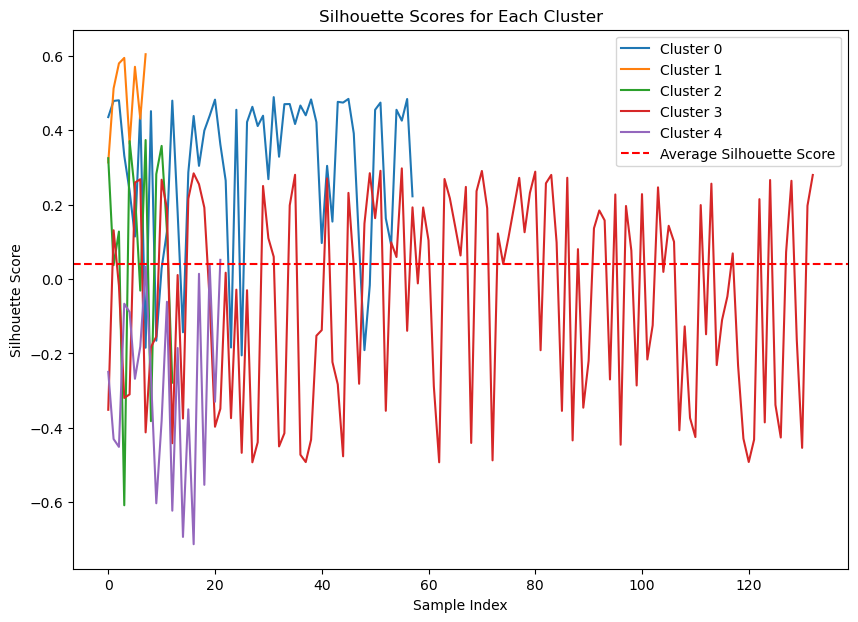

In [253]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples
import numpy as np

# Compute silhouette scores for each sample
silhouette_vals = silhouette_samples(features, clusters)

# Create a figure
plt.figure(figsize=(10, 7))

# For each cluster, plot the silhouette scores
for cluster in np.unique(clusters):
    cluster_silhouette_vals = silhouette_vals[clusters == cluster]
    plt.plot(np.arange(len(cluster_silhouette_vals)), cluster_silhouette_vals, label=f'Cluster {cluster}')

plt.title('Silhouette Scores for Each Cluster')
plt.xlabel('Sample Index')
plt.ylabel('Silhouette Score')
plt.axhline(y=silhouette_avg, color='red', linestyle='--', label='Average Silhouette Score')
plt.legend()
plt.show()

In [254]:

# Extract relevant columns for all age groups
relevant_data = cleaned_dataset[['Country', 'Age Group', 'Marital Status', 'Count']]

# Pivot the data to get counts per country and age group
marital_pivot = relevant_data.pivot_table(index='Country', columns='Marital Status', values='Count', aggfunc='sum', fill_value=0).reset_index()

# Print columns to confirm
print(marital_pivot.columns)

# Show the first few rows to inspect
print(marital_pivot.head())

Index(['Country', 'Divorced', 'Married', 'Separated', 'Single', 'Widowed'], dtype='object', name='Marital Status')
Marital Status         Country  Divorced  Married  Separated  Single  Widowed
0                  Afghanistan       100      116         14      71      116
1                      Albania       141      185         61      91      191
2                      Algeria       129      162         57     129      160
3               American Samoa        84       86         58      90       86
4                       Angola       101       95         87      48      121


In [255]:
# Count the total number of people for each country
marital_pivot['Total_People'] = marital_pivot.drop(columns='Country').sum(axis=1)

# Show the updated pivot table with total counts
print(marital_pivot.head())


Marital Status         Country  Divorced  Married  Separated  Single  Widowed  \
0                  Afghanistan       100      116         14      71      116   
1                      Albania       141      185         61      91      191   
2                      Algeria       129      162         57     129      160   
3               American Samoa        84       86         58      90       86   
4                       Angola       101       95         87      48      121   

Marital Status  Total_People  
0                        417  
1                        669  
2                        637  
3                        404  
4                        452  


In [256]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Prepare data for GMM by including the total number of people
Y = marital_pivot.drop(columns='Country')

# Standardize the features
scaler = StandardScaler()
Y_scaled = scaler.fit_transform(Y)

In [257]:
# Apply GMM
gmm2 = GaussianMixture(n_components=3, random_state=42)  # Adjust the number of components as needed
clusters2 = gmm2.fit_predict(Y_scaled)

# Add cluster labels to the pivoted data
marital_pivot['Cluster'] = clusters2

Cluster labels distribution:
1    177
0     36
2     21
Name: Cluster, dtype: int64


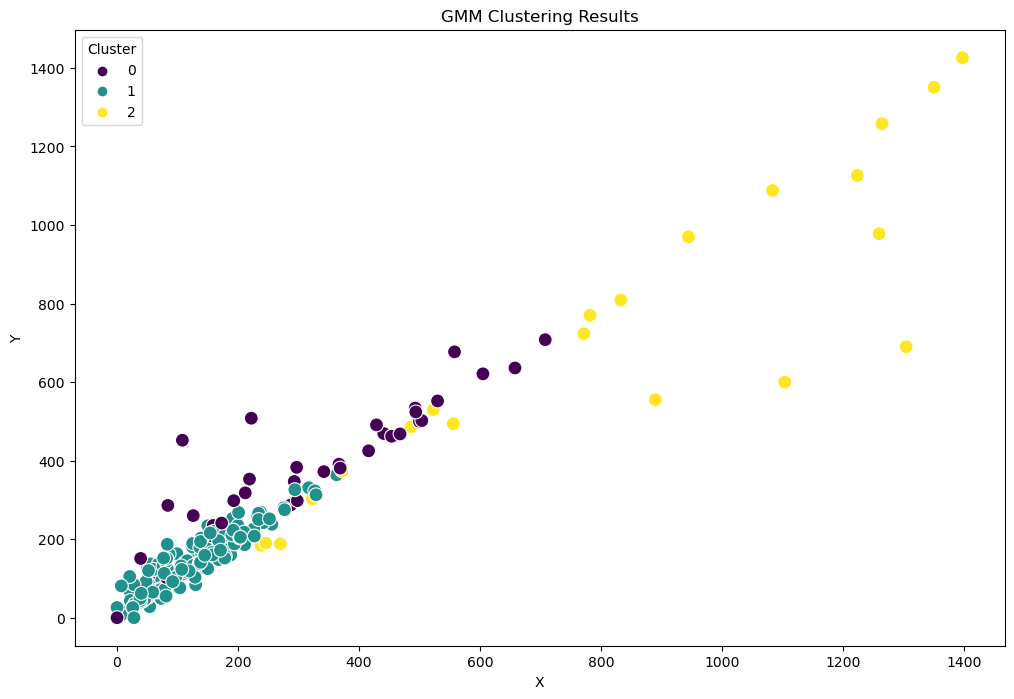

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cluster distribution
print("Cluster labels distribution:")
print(marital_pivot['Cluster'].value_counts())

# Visualize the results (for two selected age groups)
plt.figure(figsize=(12, 8))
sns.scatterplot(x=marital_pivot.iloc[:, 1], y=marital_pivot.iloc[:, 2], hue=marital_pivot['Cluster'], palette='viridis', s=100)
plt.title('GMM Clustering Results')
plt.xlabel('X')  # Adjust based on your age groups
plt.ylabel('Y')  # Adjust based on your age groups
plt.legend(title='Cluster')
plt.show()


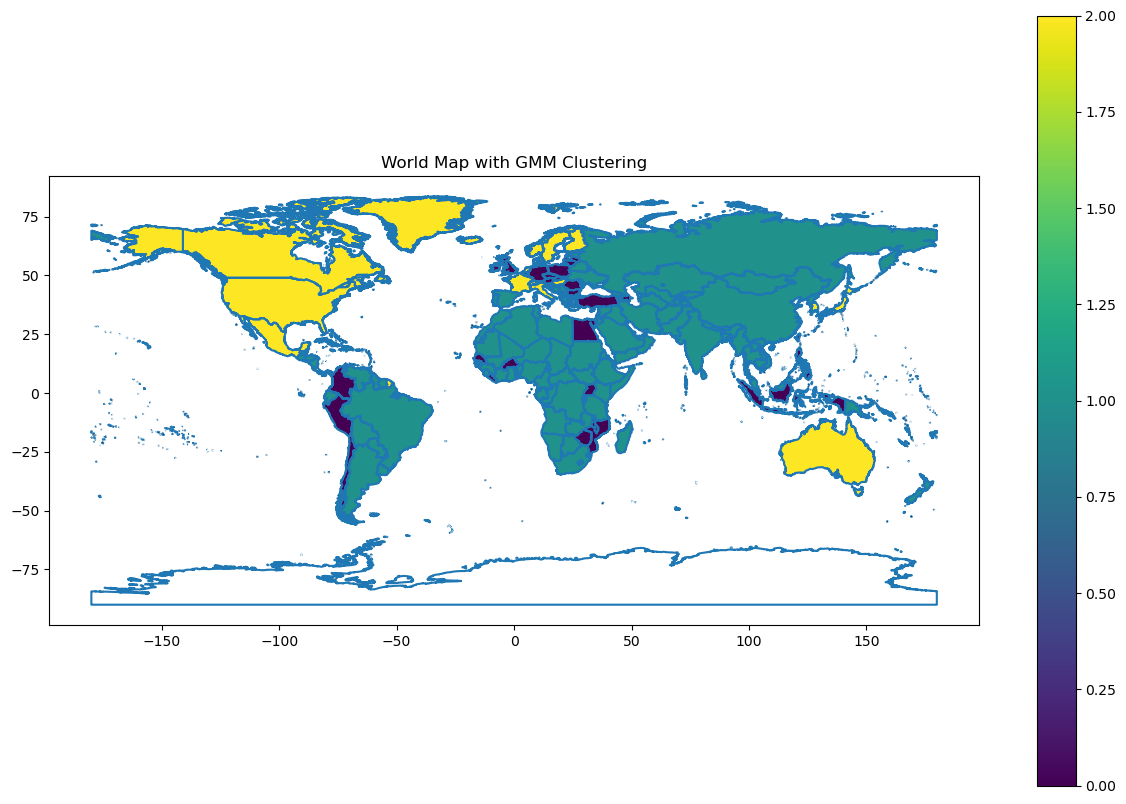

In [259]:
# Merge with clustering results
world_clusters2 = world.merge(marital_pivot[['Country', 'Cluster']], how='left', left_on='ADMIN', right_on='Country')

# Plot the world map with clusters
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world_clusters2.plot(column='Cluster', ax=ax, legend=True, cmap='viridis', edgecolor='k', linewidth=0.5)
plt.title('World Map with GMM Clustering')
plt.show()

# 4.5 Spectral Clustering

# App 1: Identifying marriage patterns in countries, complex relationships.

In [260]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import SpectralClustering
import re

# Function to calculate midpoint of age ranges
def age_group_midpoint(age_range):
    # Extract the two numbers from the age range
    numbers = list(map(int, re.findall(r'\d+', age_range)))
    return sum(numbers) / len(numbers)

# Load dataset
data = pd.read_csv('World_Marriage_Cleaned_Dataset.csv')

# Select relevant columns
data_subset = data[['Country', 'Age Group', 'Sex', 'Marital Status']]

# Convert Age Group to midpoints
data_subset['Age Group Midpoint'] = data_subset['Age Group'].apply(age_group_midpoint)

# One-Hot Encoding for categorical columns
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data_subset[['Country', 'Sex', 'Marital Status']])

# Standardizing the Age Group Midpoints
scaler = StandardScaler()
age_scaled = scaler.fit_transform(data_subset[['Age Group Midpoint']])

# Combine encoded data and scaled age group midpoints
X = pd.concat([pd.DataFrame(encoded_data.toarray()), pd.DataFrame(age_scaled)], axis=1)

# Apply Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=42)
clusters = spectral_clustering.fit_predict(X)

# Add clusters to the original dataset
data['Cluster'] = clusters

# View the clustered dataset
print(data.head())

KeyboardInterrupt: 

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import re

# Function to calculate midpoint of age ranges
def age_group_midpoint(age_range):
    numbers = list(map(int, re.findall(r'\d+', age_range)))
    return sum(numbers) / len(numbers)

# Load dataset
data = pd.read_csv('World_Marriage_Cleaned_Dataset.csv')

# Select relevant columns
data_subset = data[['Country', 'Age Group', 'Sex', 'Marital Status']]

# Convert Age Group to midpoints
data_subset['Age Group Midpoint'] = data_subset['Age Group'].apply(age_group_midpoint)

# One-Hot Encoding for categorical columns
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data_subset[['Country', 'Sex', 'Marital Status']])

# Standardizing the Age Group Midpoints
scaler = StandardScaler()
age_scaled = scaler.fit_transform(data_subset[['Age Group Midpoint']])

# Combine encoded data and scaled age group midpoints
X = pd.concat([pd.DataFrame(encoded_data.toarray()), pd.DataFrame(age_scaled)], axis=1)

# Apply Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=42)
clusters = spectral_clustering.fit_predict(X)

# Add clusters to the original dataset
data['Cluster'] = clusters

# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot clusters
plt.figure(figsize=(10, 6))
for cluster in sorted(data['Cluster'].unique()):
    cluster_data = X_pca[data['Cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}', alpha=0.6)

plt.title('Spectral Clustering of Marriage Patterns')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

# Example geographical coordinates data
geo_data = {
    'Country': ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola'],
    'Latitude': [33.93911, 41.15303, 28.03389, 42.50779, -11.20269],
    'Longitude': [67.70995, 20.16831, 1.65962, 1.52109, 17.87389]
}

# Convert to DataFrame
geo_df = pd.DataFrame(geo_data)

# Save to CSV
geo_df.to_csv('Geographical_Coordinates.csv', index=False)

In [ ]:
# Load the newly created geographical coordinates file
geo_data = pd.read_csv('Geographical_Coordinates.csv')

# Proceed with merging and analysis as previously described


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import SpectralClustering
import re

# Function to calculate midpoint of age ranges
def age_group_midpoint(age_range):
    numbers = list(map(int, re.findall(r'\d+', age_range)))
    return sum(numbers) / len(numbers)

# Load the dataset
data = pd.read_csv('World_Marriage_Cleaned_Dataset.csv')

# Convert Age Group to midpoints
data['Age Group Midpoint'] = data['Age Group'].apply(age_group_midpoint)

# One-Hot Encoding for categorical columns
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data[['Country', 'Sex', 'Marital Status']])

# Standardizing the Age Group Midpoints
scaler = StandardScaler()
age_scaled = scaler.fit_transform(data[['Age Group Midpoint']])

# Combine encoded data and scaled age midpoints
X = pd.concat([
    pd.DataFrame(encoded_data.toarray()),
    pd.DataFrame(age_scaled)
], axis=1)

# Apply Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=42)
clusters = spectral_clustering.fit_predict(X)

# Add clusters to the original dataset
data['Cluster'] = clusters

# View the clustered dataset
print(data.head())


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import re

# Function to calculate midpoint of age ranges
def age_group_midpoint(age_range):
    numbers = list(map(int, re.findall(r'\d+', age_range)))
    return sum(numbers) / len(numbers)

# Load dataset
data = pd.read_csv('World_Marriage_Cleaned_Dataset.csv')

# Select relevant columns
data_subset = data[['Country', 'Age Group', 'Sex', 'Marital Status']]

# Convert Age Group to midpoints
data_subset['Age Group Midpoint'] = data_subset['Age Group'].apply(age_group_midpoint)

# One-Hot Encoding for categorical columns
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data_subset[['Country', 'Sex', 'Marital Status']])

# Standardizing the Age Group Midpoints
scaler = StandardScaler()
age_scaled = scaler.fit_transform(data_subset[['Age Group Midpoint']])

# Combine encoded data and scaled age group midpoints
X = pd.concat([pd.DataFrame(encoded_data.toarray()), pd.DataFrame(age_scaled)], axis=1)

# Apply Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=42)
clusters = spectral_clustering.fit_predict(X)

# Add clusters to the original dataset
data['Cluster'] = clusters

# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot clusters
plt.figure(figsize=(10, 6))
for cluster in sorted(data['Cluster'].unique()):
    cluster_data = X_pca[data['Cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}', alpha=0.6)

plt.title('Spectral Clustering of Marriage Patterns')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()